In [1]:
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import zipfile
import warnings
import matplotlib
matplotlib.style.use('ggplot')
import scipy
from scipy import stats
import warnings
from sklearn.model_selection import train_test_split, GridSearchCV, KFold, cross_val_score, cross_validate
from sklearn.feature_selection import RFECV 
# Feature ranking with recursive feature elimination and cross-validated selection of the best number of features.
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import AdaBoostRegressor, BaggingRegressor,GradientBoostingRegressor,RandomForestRegressor
from  sklearn.linear_model import Lasso, LinearRegression,ridge_regression,SGDRegressor, Ridge
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error,r2_score
%config InlineBackend.figure_format = 'png' #set 'png' here when working on notebook
warnings.filterwarnings('ignore') 

# Set some parameters to get good visuals - style to ggplot and size to 15,10
plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (4, 3)

In [3]:
zf=zipfile.ZipFile(r"C:\Users\payal2.bhatia\Downloads\train_bFQbE3f.zip")

In [2]:
data=pd.read_csv(zf.open("train.csv"))

NameError: name 'pd' is not defined

In [5]:
data.columns

Index(['id', 'account_type', 'gender', 'age', 'region_code', 'cc_cons_apr',
       'dc_cons_apr', 'cc_cons_may', 'dc_cons_may', 'cc_cons_jun',
       'dc_cons_jun', 'cc_count_apr', 'cc_count_may', 'cc_count_jun',
       'dc_count_apr', 'dc_count_may', 'dc_count_jun', 'card_lim',
       'personal_loan_active', 'vehicle_loan_active', 'personal_loan_closed',
       'vehicle_loan_closed', 'investment_1', 'investment_2', 'investment_3',
       'investment_4', 'debit_amount_apr', 'credit_amount_apr',
       'debit_count_apr', 'credit_count_apr', 'max_credit_amount_apr',
       'debit_amount_may', 'credit_amount_may', 'credit_count_may',
       'debit_count_may', 'max_credit_amount_may', 'debit_amount_jun',
       'credit_amount_jun', 'credit_count_jun', 'debit_count_jun',
       'max_credit_amount_jun', 'loan_enq', 'emi_active', 'cc_cons'],
      dtype='object')

In [145]:
data.shape

(32820, 44)

In [143]:
len(data.id.unique())

32820

In [144]:
data.gender.value_counts()

M    28106
F     4714
Name: gender, dtype: int64

In [51]:
data.head()

,id,account_type,gender,age,region_code,cc_cons_apr,dc_cons_apr,cc_cons_may,dc_cons_may,cc_cons_jun,...,debit_count_may,max_credit_amount_may,debit_amount_jun,credit_amount_jun,credit_count_jun,debit_count_jun,max_credit_amount_jun,loan_enq,emi_active,cc_cons
0,23334,saving,M,63,305,7695.00,NaN,479.00,NaN,622.0,...,2.0,45000.0,20215.85,1279.37,7.0,3.0,470.0,NaN,0.00,435
1,20329,current,M,33,326,52702.00,988.72,29873.00,NaN,1087.0,...,10.0,150000.0,122037.66,55390.00,8.0,19.0,27000.0,NaN,4963.33,1921
2,17679,current,M,44,264,10800.49,3215.52,21659.64,1607.0,1168.0,...,7.0,13800.0,46827.00,29297.91,6.0,19.0,20800.0,NaN,0.00,1970
3,16428,saving,M,44,233,20936.00,NaN,2094.00,NaN,11778.5,...,1.0,19300.0,5426.55,7544.00,3.0,1.0,5300.0,NaN,1238.18,21579
4,18721,saving,F,35,324,1183.83,NaN,3656.29,NaN,945.0,...,3.0,3000.0,26178.05,53483.00,4.0,4.0,45000.0,NaN,0.00,1814


In [52]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32820 entries, 0 to 32819
Data columns (total 44 columns):
id                       32820 non-null int64
account_type             32820 non-null object
gender                   32820 non-null object
age                      32820 non-null int64
region_code              32820 non-null int64
cc_cons_apr              32820 non-null float64
dc_cons_apr              13768 non-null float64
cc_cons_may              32820 non-null float64
dc_cons_may              15481 non-null float64
cc_cons_jun              32820 non-null float64
dc_cons_jun              11523 non-null float64
cc_count_apr             30421 non-null float64
cc_count_may             31667 non-null float64
cc_count_jun             31230 non-null float64
dc_count_apr             13768 non-null float64
dc_count_may             15481 non-null float64
dc_count_jun             17323 non-null float64
card_lim                 32811 non-null float64
personal_loan_active     2742 non-n

In [6]:
y=data.cc_cons

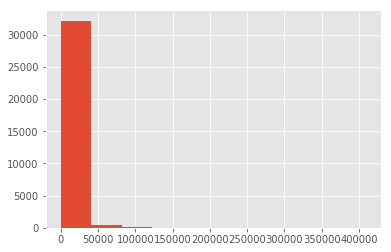

(-20431.5, 40000)

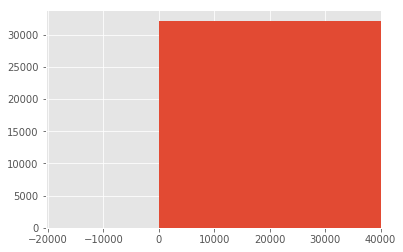

In [11]:
y.hist()
plt.show()
y.hist()
plt.xlim(right=40000)

In [54]:
data.dtypes

id                         int64
account_type              object
gender                    object
age                        int64
region_code                int64
cc_cons_apr              float64
dc_cons_apr              float64
cc_cons_may              float64
dc_cons_may              float64
cc_cons_jun              float64
dc_cons_jun              float64
cc_count_apr             float64
cc_count_may             float64
cc_count_jun             float64
dc_count_apr             float64
dc_count_may             float64
dc_count_jun             float64
card_lim                 float64
personal_loan_active     float64
vehicle_loan_active      float64
personal_loan_closed     float64
vehicle_loan_closed      float64
investment_1             float64
investment_2             float64
investment_3             float64
investment_4             float64
debit_amount_apr         float64
credit_amount_apr        float64
debit_count_apr          float64
credit_count_apr         float64
max_credit

In [55]:
data.isna().sum().sort_values(ascending=False)

investment_4             32414
loan_enq                 32211
vehicle_loan_active      31974
investment_3             31488
investment_1             31394
vehicle_loan_closed      31195
investment_2             30482
personal_loan_active     30078
personal_loan_closed     29937
dc_cons_jun              21297
dc_cons_apr              19052
dc_count_apr             19052
dc_count_may             17339
dc_cons_may              17339
dc_count_jun             15497
credit_amount_may         3405
max_credit_amount_may     3405
credit_amount_apr         3302
max_credit_amount_apr     3302
cc_count_apr              2399
debit_amount_may          2301
debit_amount_jun          2195
credit_count_may          2071
debit_count_may           2071
debit_amount_apr          1890
debit_count_apr           1758
credit_count_apr          1758
cc_count_jun              1590
credit_amount_jun         1543
max_credit_amount_jun     1543
debit_count_jun           1528
credit_count_jun          1528
cc_count

In [56]:
data.shape

(32820, 44)

In [57]:
new_data=data.copy()

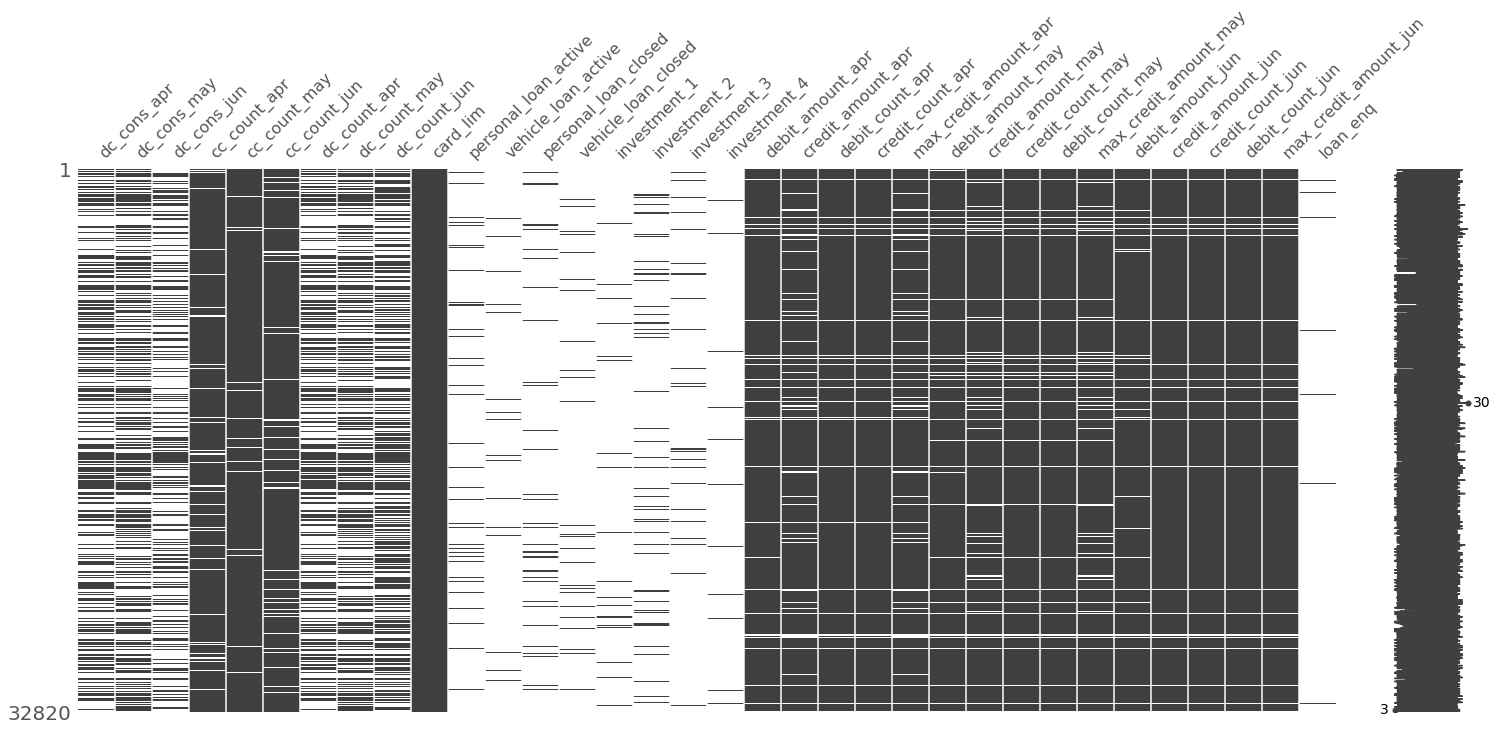

In [58]:
import missingno as msno
missingdata_df = new_data.columns[new_data.isnull().any()].tolist()
msno.matrix(new_data[missingdata_df])

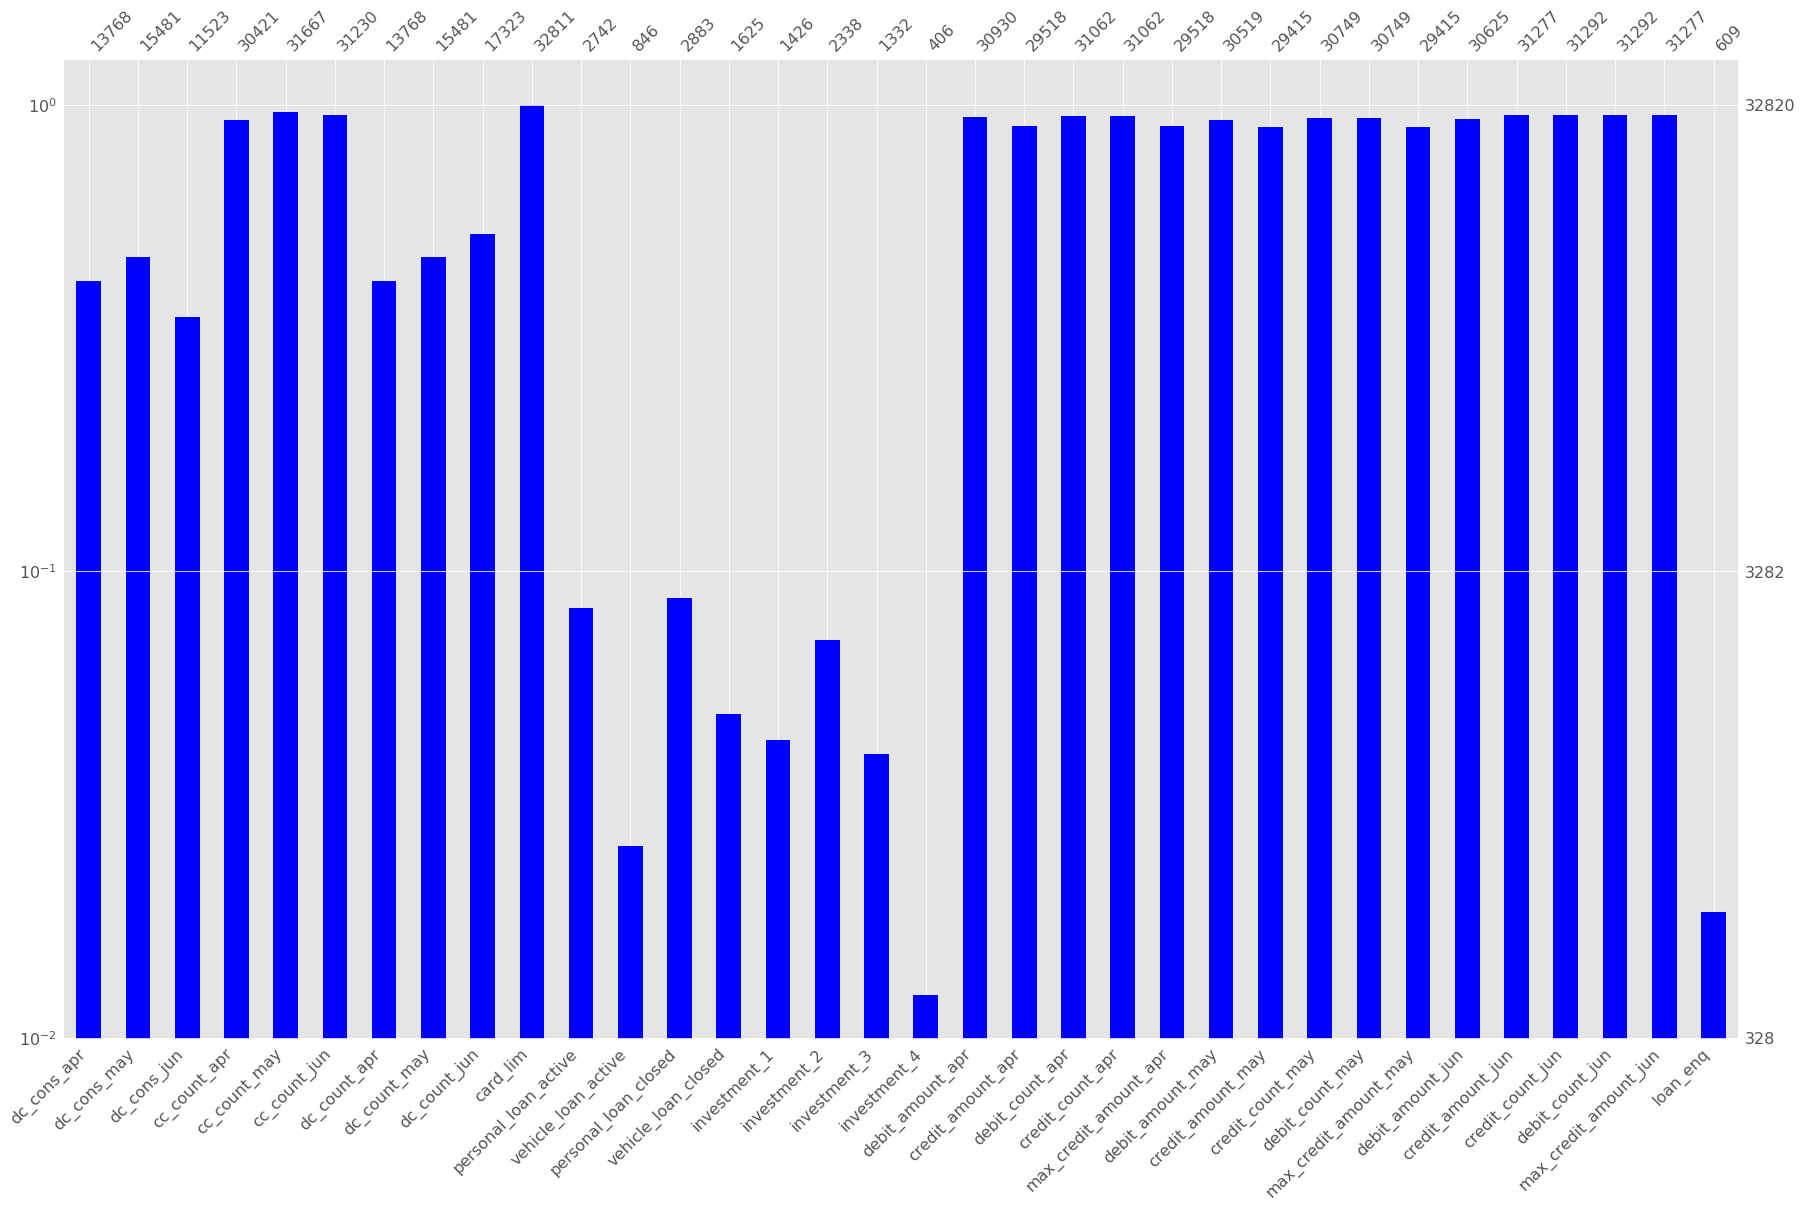

In [59]:
msno.bar(new_data[missingdata_df], color="blue", log=True, figsize=(30,18))

###### Not much info is available about investments and loans .. segregating data

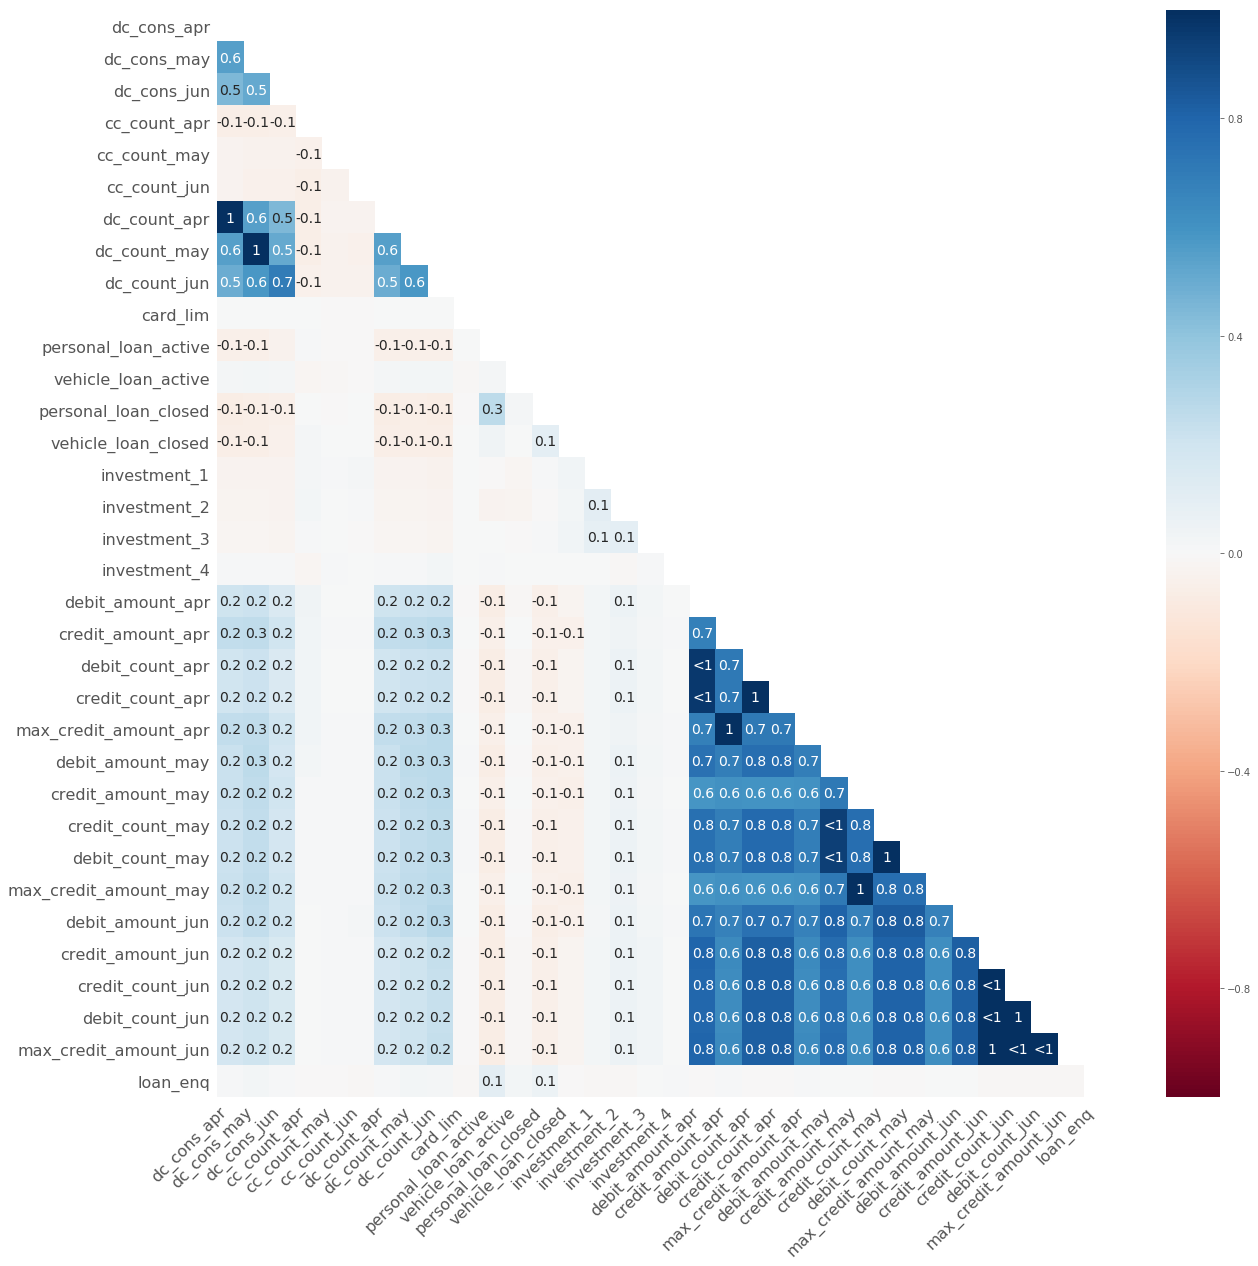

In [60]:
msno.heatmap(new_data[missingdata_df], figsize=(20,20))

#### Let's start off by potentially removing some 'redundant' variables and then some others ones which are 'easy' to fix

investment_4            
loan_enq                 
vehicle_loan_active      
investment_3             
investment_1             
vehicle_loan_closed      
investment_2             
personal_loan_active     
personal_loan_closed     
dc_cons_jun              
dc_cons_apr              
dc_count_apr             
dc_count_may             
dc_cons_may              
dc_count_jun  

In [62]:
investment_data=new_data[["investment_1", "investment_2","investment_3","investment_4"]]

In [70]:
investment_data.isnull().sum()

investment_1    31394
investment_2    30482
investment_3    31488
investment_4    32414
dtype: int64

###### dropping these columns

In [94]:
new_data1.drop(["investment_1", "investment_2","investment_3","investment_4"], axis=1, inplace=True)

In [95]:
# dropping target column as well
new_data1.drop(["cc_cons"], axis=1, inplace=True)

In [98]:
new_data1[new_data1["dc_cons_apr"].isnull() & new_data1["dc_count_apr"].isnull()]

,id,account_type,gender,age,region_code,cc_cons_apr,dc_cons_apr,cc_cons_may,dc_cons_may,cc_cons_jun,...,credit_count_may,debit_count_may,max_credit_amount_may,debit_amount_jun,credit_amount_jun,credit_count_jun,debit_count_jun,max_credit_amount_jun,loan_enq,emi_active
0,23334,saving,M,63,305,7695.00,NaN,479.000,NaN,622.000,...,3.0,2.0,45000.00,20215.85,1279.37,7.0,3.0,470.00,NaN,0.00
3,16428,saving,M,44,233,20936.00,NaN,2094.000,NaN,11778.500,...,1.0,1.0,19300.00,5426.55,7544.00,3.0,1.0,5300.00,NaN,1238.18
4,18721,saving,F,35,324,1183.83,NaN,3656.290,NaN,945.000,...,2.0,3.0,3000.00,26178.05,53483.00,4.0,4.0,45000.00,NaN,0.00
8,41628,current,M,37,233,9214.92,NaN,95625.880,16423.00,11419.760,...,26.0,28.0,51555.00,285663.35,254939.15,25.0,34.0,92800.00,NaN,0.00
9,16836,saving,M,47,233,9191.31,NaN,8327.550,NaN,14642.000,...,NaN,NaN,NaN,NaN,503.00,1.0,0.0,275.00,NaN,0.00
10,12242,saving,M,58,534,38237.52,NaN,23613.670,511.00,306.000,...,4.0,4.0,40000.00,38053.00,42712.60,4.0,2.0,40000.00,Y,2000.40
11,25418,current,M,43,653,4646.53,NaN,7694.500,NaN,2346.000,...,3.0,5.0,35247.00,25009.32,78940.00,4.0,10.0,60848.00,NaN,7017.14
14,28475,current,M,49,723,8448.10,NaN,8360.400,356.00,1370.000,...,6.0,12.0,79834.00,127564.74,81541.29,3.0,17.0,80789.00,NaN,283.92
15,19469,current,M,33,554,3087.85,NaN,18785.690,NaN,436.000,...,3.0,6.0,13534.00,35145.45,24522.00,3.0,6.0,15000.00,NaN,0.00
18,37561,current,M,36,370,6147.00,NaN,21528.840,NaN,2291.630,...,6.0,14.0,20772.00,47462.85,37834.60,4.0,11.0,20822.00,NaN,0.00


In [112]:
loan_data=new_data1[["vehicle_loan_active","vehicle_loan_closed","personal_loan_active","personal_loan_closed"]]

In [113]:
new_data1.drop(loan_data, axis=1, inplace=True)

In [208]:
apr=[]
for i in new_data1.columns:
    if(i.endswith("apr")):
        apr.append(i)
apr_data=new_data1.loc[:,apr]
# apr_data[["id","account_type","gender","age"]]=new_data1[["id","account_type","gender","age"]]
# apr_data["card_lim"]=new_data1["card_lim"]

In [210]:
may=[]
for i in new_data1.columns:
    if(i.endswith("may")):
        may.append(i)
may_data=new_data1.loc[:,may]
# may_data[["id","account_type","gender","age"]]=new_data1[["id","account_type","gender","age"]]

In [211]:
jun=[]
for i in new_data1.columns:
    if(i.endswith("jun")):
        jun.append(i)
jun_data=new_data1.loc[:,jun]
# jun_data[["id","account_type","gender","age"]]=new_data1[["id","account_type","gender","age"]]

In [160]:
apr_data.corr()

,cc_cons_apr,dc_cons_apr,cc_count_apr,dc_count_apr,debit_amount_apr,credit_amount_apr,debit_count_apr,credit_count_apr,max_credit_amount_apr,id,age,card_lim
cc_cons_apr,1.000000,0.081402,0.406129,-0.033555,0.179771,0.184229,-0.017497,0.095116,0.141922,0.000364,0.120472,0.313055
dc_cons_apr,0.081402,1.000000,-0.018971,0.373446,0.219877,0.196161,0.250722,0.109659,0.165483,-0.003566,0.035335,0.071596
cc_count_apr,0.406129,-0.018971,1.000000,-0.080851,0.078235,0.075210,-0.015670,0.077768,0.059234,-0.004069,0.009516,0.146185
dc_count_apr,-0.033555,0.373446,-0.080851,1.000000,0.054992,0.032448,0.624678,0.130691,0.033096,0.001897,-0.114461,-0.035914
debit_amount_apr,0.179771,0.219877,0.078235,0.054992,1.000000,0.919992,0.196450,0.254589,0.778468,-0.003578,0.081769,0.204589
credit_amount_apr,0.184229,0.196161,0.075210,0.032448,0.919992,1.000000,0.151440,0.244523,0.875464,-0.002439,0.092816,0.212702
debit_count_apr,-0.017497,0.250722,-0.015670,0.624678,0.196450,0.151440,1.000000,0.496494,0.099743,0.000950,-0.174895,-0.082680
credit_count_apr,0.095116,0.109659,0.077768,0.130691,0.254589,0.244523,0.496494,1.000000,0.093479,-0.009687,-0.078496,0.009949
max_credit_amount_apr,0.141922,0.165483,0.059234,0.033096,0.778468,0.875464,0.099743,0.093479,1.000000,0.000741,0.090173,0.191057
id,0.000364,-0.003566,-0.004069,0.001897,-0.003578,-0.002439,0.000950,-0.009687,0.000741,1.000000,0.001639,0.001180


In [161]:
apr_data[["debit_amount_apr","dc_cons_apr","cc_cons_apr","credit_count_apr"]]

,debit_amount_apr,dc_cons_apr,cc_cons_apr,credit_count_apr
0,51205.47,NaN,7695.000,1.0
1,159050.76,988.72,52702.000,9.0
2,51484.55,3215.52,10800.490,4.0
3,1981.07,NaN,20936.000,1.0
4,6462.00,NaN,1183.830,1.0
5,7717.72,1371.00,53819.880,4.0
6,18794.00,4237.00,1495.000,2.0
7,41384.23,5976.00,1847.000,3.0
8,76357.04,NaN,9214.920,13.0
9,198.25,NaN,9191.310,0.0


In [153]:
may_data.corr()

,cc_cons_may,dc_cons_may,cc_count_may,dc_count_may,debit_amount_may,credit_amount_may,credit_count_may,debit_count_may,max_credit_amount_may,id,age
cc_cons_may,1.000000,0.104173,0.414781,-0.009551,0.166913,0.157050,0.093778,0.011867,0.131391,-0.002718,0.088864
dc_cons_may,0.104173,1.000000,-0.014517,0.312530,0.267920,0.194846,0.115126,0.239050,0.163014,-0.002323,0.027562
cc_count_may,0.414781,-0.014517,1.000000,-0.062465,0.082237,0.072576,0.062887,-0.022652,0.063460,0.003123,0.016150
dc_count_may,-0.009551,0.312530,-0.062465,1.000000,0.075804,0.054514,0.157226,0.709764,0.052305,0.002347,-0.121690
debit_amount_may,0.166913,0.267920,0.082237,0.075804,1.000000,0.864222,0.227895,0.176555,0.736844,-0.000311,0.066115
credit_amount_may,0.157050,0.194846,0.072576,0.054514,0.864222,1.000000,0.231984,0.149116,0.933305,0.000584,0.079843
credit_count_may,0.093778,0.115126,0.062887,0.157226,0.227895,0.231984,1.000000,0.519585,0.105341,-0.006357,-0.095974
debit_count_may,0.011867,0.239050,-0.022652,0.709764,0.176555,0.149116,0.519585,1.000000,0.097855,0.002339,-0.156123
max_credit_amount_may,0.131391,0.163014,0.063460,0.052305,0.736844,0.933305,0.105341,0.097855,1.000000,0.000670,0.089718
id,-0.002718,-0.002323,0.003123,0.002347,-0.000311,0.000584,-0.006357,0.002339,0.000670,1.000000,0.001639


In [154]:
jun_data.corr()

,cc_cons_jun,dc_cons_jun,cc_count_jun,dc_count_jun,debit_amount_jun,credit_amount_jun,credit_count_jun,debit_count_jun,max_credit_amount_jun,id,age
cc_cons_jun,1.000000,0.148500,0.216340,-0.007633,0.112644,0.114291,0.037305,-0.014340,0.133351,0.002291,0.102278
dc_cons_jun,0.148500,1.000000,0.003286,0.269136,0.227786,0.176929,0.055775,0.216546,0.137042,-0.011750,0.038806
cc_count_jun,0.216340,0.003286,1.000000,-0.075280,0.052785,0.056532,0.051605,-0.043145,0.076708,0.001777,0.038399
dc_count_jun,-0.007633,0.269136,-0.075280,1.000000,0.075259,0.072342,0.152663,0.738168,0.060961,0.007439,-0.123600
debit_amount_jun,0.112644,0.227786,0.052785,0.075259,1.000000,0.966272,0.159952,0.121421,0.749724,-0.002670,0.043599
credit_amount_jun,0.114291,0.176929,0.056532,0.072342,0.966272,1.000000,0.173750,0.117967,0.799787,-0.003648,0.041543
credit_count_jun,0.037305,0.055775,0.051605,0.152663,0.159952,0.173750,1.000000,0.503490,0.100020,-0.013925,-0.126555
debit_count_jun,-0.014340,0.216546,-0.043145,0.738168,0.121421,0.117967,0.503490,1.000000,0.119258,-0.001678,-0.175591
max_credit_amount_jun,0.133351,0.137042,0.076708,0.060961,0.749724,0.799787,0.100020,0.119258,1.000000,-0.004844,0.068314
id,0.002291,-0.011750,0.001777,0.007439,-0.002670,-0.003648,-0.013925,-0.001678,-0.004844,1.000000,0.001639


Strong correlation among debit amount and credit amount ; debit amount and maximum credit amount ; credit amount and maximum credit amount

In [165]:
apr_data.describe()

,cc_cons_apr,dc_cons_apr,cc_count_apr,dc_count_apr,debit_amount_apr,credit_amount_apr,debit_count_apr,credit_count_apr,max_credit_amount_apr,id,age,card_lim
count,32820.000000,13768.000000,30421.000000,13768.000000,3.093000e+04,2.951800e+04,31062.000000,31062.000000,2.951800e+04,32820.000000,32820.000000,32811.000000
mean,16661.907189,5727.615837,9.162191,5.256900,7.002974e+04,7.541190e+04,14.887290,3.791771,4.647113e+04,23450.929616,35.951676,121553.749657
std,25138.435416,11544.058014,10.790714,6.147011,1.641944e+05,1.777199e+05,11.589652,3.482266,1.181413e+05,13495.676061,8.529949,123019.826520
min,233.970000,10.010000,1.000000,1.000000,4.010000e+00,3.432000e+01,0.000000,0.000000,1.800000e-01,0.000000,22.000000,0.000000
25%,3712.000000,849.000000,3.000000,1.000000,2.229260e+04,2.531025e+04,6.000000,2.000000,1.800000e+04,11824.750000,31.000000,45000.000000
50%,8912.790000,2282.160000,7.000000,3.000000,4.114024e+04,4.394596e+04,12.000000,3.000000,2.813100e+04,23478.500000,34.000000,75000.000000
75%,19932.060000,6074.600000,12.000000,7.000000,7.541069e+04,7.975369e+04,20.000000,5.000000,4.800000e+04,35096.250000,39.000000,145000.000000
max,804712.580000,366223.160000,1012.000000,82.000000,1.353571e+07,1.310058e+07,147.000000,78.000000,1.202915e+07,46886.000000,224.000000,1000000.000000


#### Checking normality proability plot for target variable

((array([-4.09487912, -3.88453054, -3.76966688, ...,  3.76966688,
          3.88453054,  4.09487912]),
  array([     0,      0,      0, ..., 233191, 352580, 408630], dtype=int64)),
 (8482.097440438014, 6824.631840341254, 0.6807206683248367))

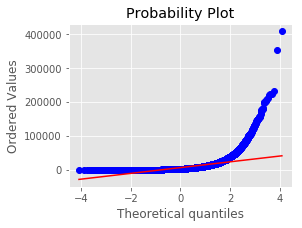

In [167]:
import scipy
from scipy import stats
stats.probplot(y,  plot=sns.mpl.pyplot)


Positive Skew Data

In [171]:
# stats.probplot(data.color,  plot=sns.mpl.pyplot)

In [173]:
apr_data.columns

Index(['cc_cons_apr', 'dc_cons_apr', 'cc_count_apr', 'dc_count_apr',
       'debit_amount_apr', 'credit_amount_apr', 'debit_count_apr',
       'credit_count_apr', 'max_credit_amount_apr', 'id', 'account_type',
       'gender', 'age', 'card_lim'],
      dtype='object')

In [212]:
apr_data.drop(['dc_cons_apr','dc_count_apr'], axis=1, inplace=True)
may_data.drop(['dc_cons_may','dc_count_may'], axis=1, inplace=True)
jun_data.drop(['dc_cons_jun','dc_count_jun'], axis=1, inplace=True)

Removing Debit card usage  and others

In [179]:
apr_data.drop(['id', 'account_type',
       'gender', 'age', 'card_lim'], axis=1, inplace=True)
may_data.drop(['id', 'account_type',
       'gender', 'age'], axis=1, inplace=True)
jun_data.drop(['id', 'account_type',
       'gender', 'age'], axis=1, inplace=True)

In [180]:
apr_data.columns

Index(['cc_cons_apr', 'cc_count_apr', 'debit_amount_apr', 'credit_amount_apr',
       'debit_count_apr', 'credit_count_apr', 'max_credit_amount_apr'],
      dtype='object')

In [186]:
apr_data.describe()

,cc_cons_apr,cc_count_apr,debit_amount_apr,credit_amount_apr,debit_count_apr,credit_count_apr,max_credit_amount_apr
count,32820.000000,30421.000000,3.093000e+04,2.951800e+04,31062.000000,31062.000000,2.951800e+04
mean,16661.907189,9.162191,7.002974e+04,7.541190e+04,14.887290,3.791771,4.647113e+04
std,25138.435416,10.790714,1.641944e+05,1.777199e+05,11.589652,3.482266,1.181413e+05
min,233.970000,1.000000,4.010000e+00,3.432000e+01,0.000000,0.000000,1.800000e-01
25%,3712.000000,3.000000,2.229260e+04,2.531025e+04,6.000000,2.000000,1.800000e+04
50%,8912.790000,7.000000,4.114024e+04,4.394596e+04,12.000000,3.000000,2.813100e+04
75%,19932.060000,12.000000,7.541069e+04,7.975369e+04,20.000000,5.000000,4.800000e+04
max,804712.580000,1012.000000,1.353571e+07,1.310058e+07,147.000000,78.000000,1.202915e+07


In [188]:
may_data.describe()

,cc_cons_may,cc_count_may,debit_amount_may,credit_amount_may,credit_count_may,debit_count_may,max_credit_amount_may
count,3.282000e+04,31667.000000,3.051900e+04,2.941500e+04,30749.000000,30749.000000,2.941500e+04
mean,1.441190e+04,9.540184,6.709618e+04,7.959347e+04,4.087352,13.934795,4.969688e+04
std,2.363688e+04,9.648387,1.855331e+05,2.026879e+05,3.847766,11.455178,1.287256e+05
min,1.030000e+02,1.000000,1.500000e-01,1.061000e+01,0.000000,0.000000,1.500000e-01
25%,2.983298e+03,3.000000,2.010401e+04,2.467500e+04,2.000000,6.000000,1.817300e+04
50%,7.332298e+03,7.000000,3.836849e+04,4.538700e+04,3.000000,11.000000,3.000000e+04
75%,1.684785e+04,13.000000,7.373561e+04,8.917050e+04,5.000000,19.000000,5.000000e+04
max,1.117246e+06,601.000000,2.230122e+07,2.246350e+07,71.000000,171.000000,1.285103e+07


In [189]:
jun_data.describe()

,cc_cons_jun,cc_count_jun,debit_amount_jun,credit_amount_jun,credit_count_jun,debit_count_jun,max_credit_amount_jun
count,32820.000000,31230.000000,3.062500e+04,3.127700e+04,31292.000000,31292.000000,3.127700e+04
mean,9031.179889,12.298687,7.759673e+04,7.583531e+04,5.767736,16.001438,4.474355e+04
std,15720.847307,11.714253,3.140103e+05,3.062791e+05,4.704716,13.370195,1.215379e+05
min,51.000000,1.000000,5.230000e+00,1.188000e+01,0.000000,0.000000,6.000000e-02
25%,1637.875000,4.000000,2.509642e+04,2.306400e+04,3.000000,6.000000,1.600000e+04
50%,4147.487500,9.000000,4.593499e+04,4.295500e+04,5.000000,13.000000,2.687600e+04
75%,10126.250000,17.000000,8.413612e+04,8.072400e+04,7.000000,22.000000,4.701000e+04
max,382914.100000,653.000000,3.986881e+07,3.933931e+07,117.000000,164.000000,1.293238e+07


credit card and debit spend and amount for all three months is positively skewed

##### Imputing values

In [213]:
from sklearn.impute import SimpleImputer
my_imputer = SimpleImputer()
apr_data= my_imputer.fit_transform(apr_data)
may_data= my_imputer.fit_transform(may_data)
jun_data=my_imputer.fit_transform(jun_data)

In [218]:
apr_data_new=pd.DataFrame(apr_data,columns=['cc_cons_apr','cc_count_apr','debit_amount_apr','credit_amount_apr','credit_count_apr','debit_count_apr','max_credit_amount_apr'])
may_data_new=pd.DataFrame(may_data, columns=['cc_cons_may','cc_count_may','debit_amount_may','credit_amount_may','credit_count_may','debit_count_may','max_credit_amount_may'])
jun_data_new=pd.DataFrame(jun_data, columns=['cc_cons_jun','cc_count_jun','debit_amount_jun','credit_amount_jun','credit_count_jun','debit_count_jun','max_credit_amount_jun'])

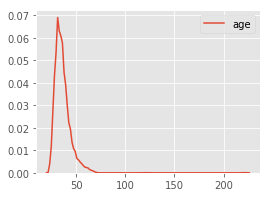

In [226]:
sns.kdeplot(new_data1["age"],)

In [227]:
new_data1["age"].describe()

count    32820.000000
mean        35.951676
std          8.529949
min         22.000000
25%         31.000000
50%         34.000000
75%         39.000000
max        224.000000
Name: age, dtype: float64

In [253]:
bins=[20, 25, 30, 35,40, 45, 55,225]
labels=["20-25", "25-30", "30-35","35-40" ,"40-45", "45-55", "Above 55"]
age_group=pd.cut(new_data1["age"], bins=bins,right=True,precision=1, include_lowest=True, labels=labels)

In [260]:
age_group.value_counts()

30-35       10465
35-40        7276
25-30        7221
40-45        3522
45-55        2572
Above 55      883
20-25         881
Name: age, dtype: int64

In [261]:
new_data1["age_group"]=age_group

In [262]:
new_data1.columns

Index(['id', 'account_type', 'gender', 'age', 'region_code', 'cc_cons_apr',
       'dc_cons_apr', 'cc_cons_may', 'dc_cons_may', 'cc_cons_jun',
       'dc_cons_jun', 'cc_count_apr', 'cc_count_may', 'cc_count_jun',
       'dc_count_apr', 'dc_count_may', 'dc_count_jun', 'card_lim',
       'debit_amount_apr', 'credit_amount_apr', 'debit_count_apr',
       'credit_count_apr', 'max_credit_amount_apr', 'debit_amount_may',
       'credit_amount_may', 'credit_count_may', 'debit_count_may',
       'max_credit_amount_may', 'debit_amount_jun', 'credit_amount_jun',
       'credit_count_jun', 'debit_count_jun', 'max_credit_amount_jun',
       'loan_enq', 'emi_active', 'age_group'],
      dtype='object')

In [263]:
new_data1.drop(['cc_cons_apr',
       'dc_cons_apr', 'cc_cons_may', 'dc_cons_may', 'cc_cons_jun',
       'dc_cons_jun', 'cc_count_apr', 'cc_count_may', 'cc_count_jun',
       'dc_count_apr', 'dc_count_may', 'dc_count_jun', 'card_lim',
       'debit_amount_apr', 'credit_amount_apr', 'debit_count_apr',
       'credit_count_apr', 'max_credit_amount_apr', 'debit_amount_may',
       'credit_amount_may', 'credit_count_may', 'debit_count_may',
       'max_credit_amount_may', 'debit_amount_jun', 'credit_amount_jun',
       'credit_count_jun', 'debit_count_jun', 'max_credit_amount_jun','age'], axis=1, inplace=True)

In [264]:
new_data1.columns

Index(['id', 'account_type', 'gender', 'region_code', 'loan_enq', 'emi_active',
       'age_group'],
      dtype='object')

In [271]:
new_data1["gender"].value_counts()

M    28106
F     4714
Name: gender, dtype: int64

In [272]:
new_data1["loan_enq"].value_counts()

Y    609
Name: loan_enq, dtype: int64

In [273]:
new_data1.isnull().sum()

id                  0
account_type        0
gender              0
region_code         0
loan_enq        32211
emi_active          0
age_group           0
dtype: int64

Assuming Na values of loan enquired as N

In [277]:
new_data1["loan_enq"]=new_data1["loan_enq"].fillna("N")
new_data1["loan_enq"].value_counts()

N    32211
Y      609
Name: loan_enq, dtype: int64

In [216]:
apr_data_new

,cc_cons_apr,cc_count_apr,debit_amount_apr,credit_amount_apr,credit_count_apr,debit_count_apr,max_credit_amount_apr
0,7695.000,2.000000,51205.470000,50259.000000,3.00000,1.000000,50000.000000
1,52702.000,11.000000,159050.760000,169812.000000,20.00000,9.000000,70000.000000
2,10800.490,6.000000,51484.550000,38942.000000,16.00000,4.000000,11700.000000
3,20936.000,9.000000,1981.070000,2294.000000,2.00000,1.000000,2000.000000
4,1183.830,2.000000,6462.000000,10271.000000,6.00000,1.000000,10000.000000
5,53819.880,14.000000,7717.720000,7792.000000,17.00000,4.000000,3000.000000
6,1495.000,1.000000,18794.000000,25721.000000,22.00000,2.000000,25282.000000
7,1847.000,2.000000,41384.230000,35415.000000,33.00000,3.000000,30281.000000
8,9214.920,1.000000,76357.040000,64656.010000,24.00000,13.000000,51606.000000
9,9191.310,5.000000,198.250000,75411.899476,1.00000,0.000000,46471.132891


In [279]:
new_data1.isnull().sum()

id              0
account_type    0
gender          0
region_code     0
loan_enq        0
emi_active      0
age_group       0
dtype: int64

In [288]:
jun_data_new.columns

Index(['cc_cons_jun', 'cc_count_jun', 'debit_amount_jun', 'credit_amount_jun',
       'credit_count_jun', 'debit_count_jun', 'max_credit_amount_jun'],
      dtype='object')

In [284]:
new_data1[['cc_cons_apr', 'cc_count_apr', 'debit_amount_apr', 'credit_amount_apr',
       'credit_count_apr', 'debit_count_apr', 'max_credit_amount_apr']]=apr_data_new[['cc_cons_apr', 'cc_count_apr', 'debit_amount_apr', 'credit_amount_apr',
       'credit_count_apr', 'debit_count_apr', 'max_credit_amount_apr']]

In [287]:
new_data1[['cc_cons_may', 'cc_count_may', 'debit_amount_may', 'credit_amount_may',
       'credit_count_may', 'debit_count_may', 'max_credit_amount_may']]=may_data_new[['cc_cons_may', 'cc_count_may', 'debit_amount_may', 'credit_amount_may',
       'credit_count_may', 'debit_count_may', 'max_credit_amount_may']]

In [289]:
new_data1[['cc_cons_jun', 'cc_count_jun', 'debit_amount_jun', 'credit_amount_jun',
       'credit_count_jun', 'debit_count_jun', 'max_credit_amount_jun']]=jun_data_new[['cc_cons_jun', 'cc_count_jun', 'debit_amount_jun', 'credit_amount_jun',
       'credit_count_jun', 'debit_count_jun', 'max_credit_amount_jun']]

Removed al missing values 

In [293]:
new_data1.shape

(32820, 28)

In [294]:
y.shape

(32820,)

#### Catgorical plots

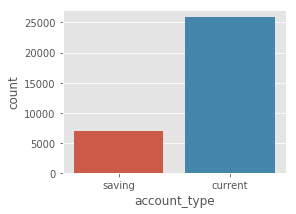

In [296]:
sns.countplot(new_data1["account_type"])

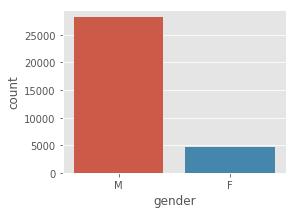

In [297]:
sns.countplot(new_data1["gender"])

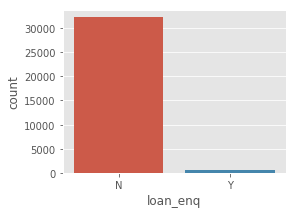

In [298]:
sns.countplot(new_data1["loan_enq"])

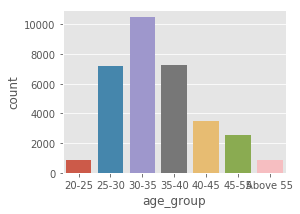

In [302]:
sns.countplot(new_data1["age_group"])

In [305]:
new_data1.columns

Index(['id', 'account_type', 'gender', 'region_code', 'loan_enq', 'emi_active',
       'age_group', 'cc_cons_apr', 'cc_count_apr', 'debit_amount_apr',
       'credit_amount_apr', 'credit_count_apr', 'debit_count_apr',
       'max_credit_amount_apr', 'cc_cons_may', 'cc_count_may',
       'debit_amount_may', 'credit_amount_may', 'credit_count_may',
       'debit_count_may', 'max_credit_amount_may', 'cc_cons_jun',
       'cc_count_jun', 'debit_amount_jun', 'credit_amount_jun',
       'credit_count_jun', 'debit_count_jun', 'max_credit_amount_jun'],
      dtype='object')

In [307]:
new_data1.groupby(["age_group"])[['cc_cons_apr','cc_cons_may','cc_cons_jun']].median()

,cc_cons_apr,cc_cons_may,cc_cons_jun
age_group,,,
20-25,6319.485,5170.620,3042.0
25-30,7459.460,6188.110,3533.6
30-35,8409.000,6986.000,4089.0
35-40,9942.200,8310.430,4462.5
40-45,10915.985,8569.285,4482.0
45-55,11594.990,9371.520,5146.0
Above 55,11416.060,9363.490,5732.0


Usage of credit card spend for age 40 and above is high in month of april

In [309]:
new_data1.groupby(["age_group"])["emi_active"].median()

age_group
20-25          0.000
25-30          0.000
30-35          0.000
35-40        950.410
40-45       1662.275
45-55       2430.780
Above 55    1612.500
Name: emi_active, dtype: float64

In [310]:
new_data1.groupby(["age_group"])["emi_active"].mean()

age_group
20-25        1107.459421
25-30        2877.972753
30-35        5008.745184
35-40        9703.587989
40-45       15305.890968
45-55       37355.090739
Above 55    21797.622956
Name: emi_active, dtype: float64

# Expected --Credit card spend by females is higher than males

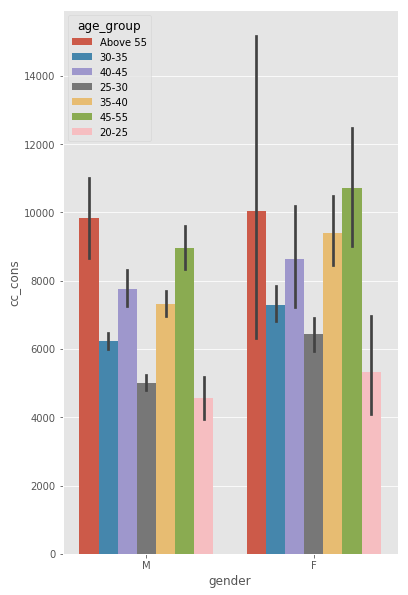

In [396]:
import matplotlib.pyplot as plt
a4_dims = (6, 10)
fig, ax = plt.subplots(figsize=a4_dims)
sns.barplot(data["gender"],data.cc_cons, hue=new_data1["age_group"], ax=ax)

Above 55 , both females and males -- not much expected

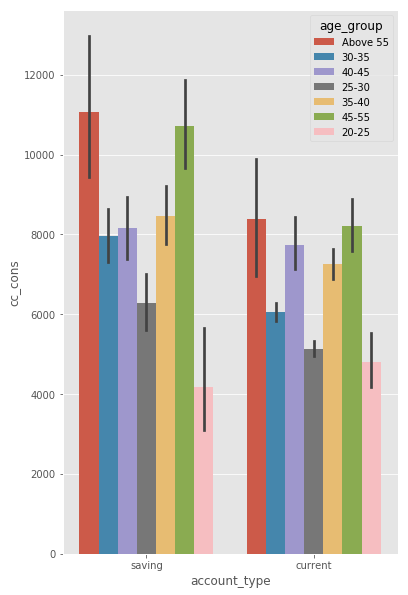

In [435]:
a4_dims = (6, 10)
fig, ax = plt.subplots(figsize=a4_dims)
sns.barplot(data["account_type"],data.cc_cons, hue=new_data1["age_group"], ax=ax)

Expected to increase in spending of credit card in savings account type

females spending in current account higher ,and males spending higher in savings account. 
also, females 25-35 in savings account spending is high

In [436]:
data.groupby(["age_group", "gender", "account_type"])["cc_cons"].agg({"mean":['mean'], "median": ['median'], "count":["count"]})

count          mean  median
                              count          mean  median
age_group gender account_type                            
20-25     F      current        213   5346.131455  2823.0
                 saving           5   4211.400000  3595.0
          M      current        593   4609.251265  2379.0
                 saving          70   4169.271429  1940.0
25-30     F      current       1225   6378.741224  3470.0
                 saving         145   6840.234483  4617.0
          M      current       5168   4847.774187  2571.0
                 saving         683   6162.661786  2987.0
30-35     F      current       1281   6974.977361  3762.0
                 saving         226   9132.300885  5506.0
          M      current       7330   5881.983083  2818.0
                 saving        1628   7801.709459  3432.0
35-40     F      current        678   9182.631268  4238.5
                 saving         213  10065.680751  4960.0
          M      current       4812   6995.745636  3105.0
                 saving        1573   8253.622378  3530.0
40-45     F      current        264   9005.053030  4237.5
                 saving         109   7718.440367  3676.0
          M      current       2243   7591.596968  3191.0
                 saving         906   8208.089404  4116.0
45-55     F      current        168   9988.904762  4501.0
                 saving         108  11876.250000  4998.0
          M      current       1448   8014.774862  3507.5
                 saving         848  10564.294811  4517.0
Above 55  F      current         27  15512.296296  4708.0
                 saving          52   7195.596154  4010.0
          M      current        375   7875.432000  3219.0
                 saving         429  11529.032634  4433.0

## Other EDA 

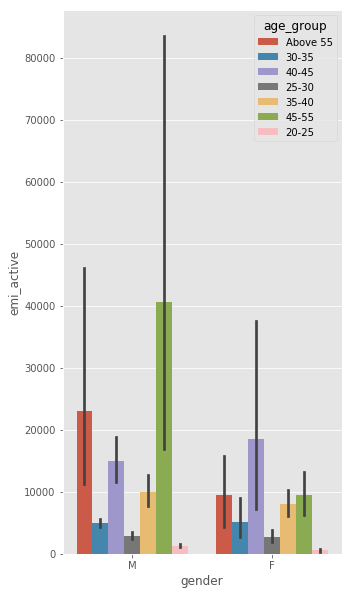

In [401]:
a4_dims = (5, 10)
fig, ax = plt.subplots(figsize=a4_dims)
sns.barplot(data["gender"],data.emi_active, hue=new_data1["age_group"], ax=ax)

emi_active is higher in males, 45-55 age group, 40-45 in females

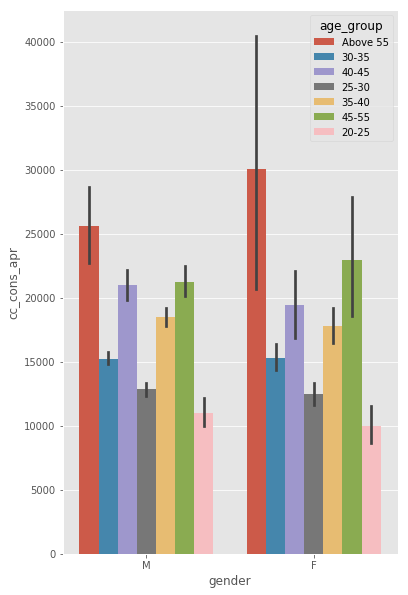

In [403]:
a4_dims = (6, 10)
fig, ax = plt.subplots(figsize=a4_dims)
sns.barplot(new_data1["gender"],new_data1.cc_cons_apr, hue=new_data1["age_group"] , ax=ax)

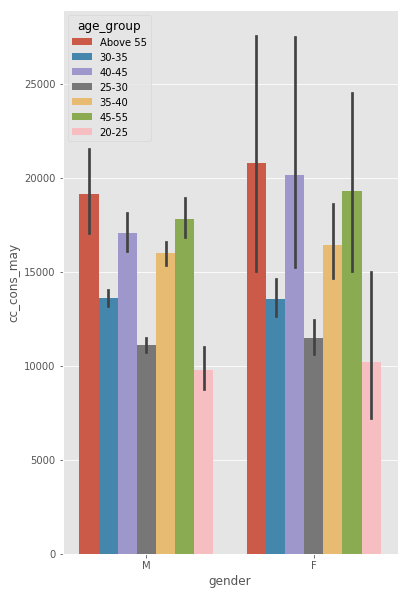

In [404]:
a4_dims = (6, 10)
fig, ax = plt.subplots(figsize=a4_dims)
sns.barplot(new_data1["gender"],new_data1.cc_cons_may, hue=new_data1["age_group"], ax=ax)

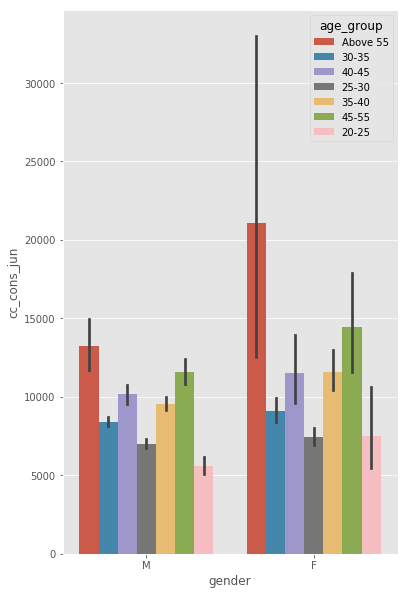

In [405]:
a4_dims = (6, 10)
fig, ax = plt.subplots(figsize=a4_dims)
sns.barplot(new_data1["gender"],new_data1.cc_cons_jun,hue=new_data1["age_group"], ax=ax)

 spending through credit card has decreased from april to june in terms of amount; though 25-35 age group was uniform in spending through credit card. Females above 55 has skewed data , and there is not much opprtunity there

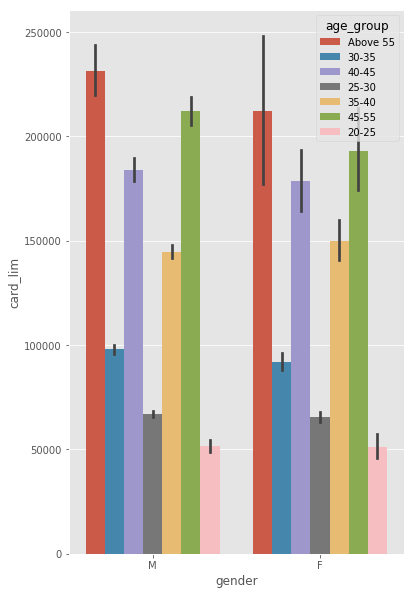

In [406]:
a4_dims = (6, 10)
fig, ax = plt.subplots(figsize=a4_dims)
sns.barplot(data["gender"],data.card_lim, hue=new_data1["age_group"], ax=ax)

card limit of females lower than males in 45-55 and above, else almost same

In [411]:
new_data1["spendToCard_limApr"]=data[["card_lim","cc_cons_apr"]].apply(lambda x: x[1]/x[0], axis=1)
new_data1["spendToCard_limMay"]=data[["card_lim","cc_cons_may"]].apply(lambda x: x[1]/x[0], axis=1)
new_data1["spendToCard_limJun"]=data[["card_lim","cc_cons_jun"]].apply(lambda x: x[1]/x[0], axis=1)

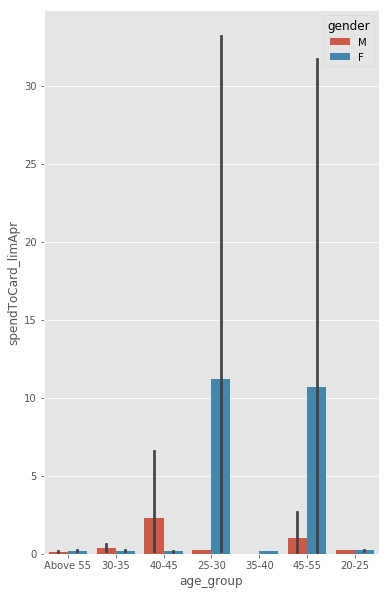

In [417]:
a4_dims = (6, 10)
fig, ax = plt.subplots(figsize=a4_dims)
sns.barplot(new_data1["age_group"], new_data1["spendToCard_limApr"], hue=new_data1["gender"], ax=ax)

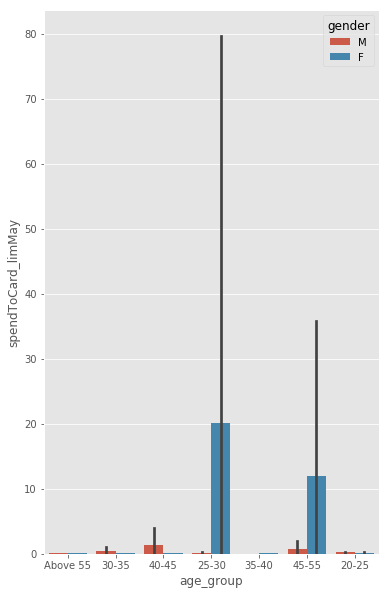

In [416]:
a4_dims = (6, 10)
fig, ax = plt.subplots(figsize=a4_dims)
sns.barplot(new_data1["age_group"], new_data1["spendToCard_limMay"], hue=new_data1["gender"], ax=ax)

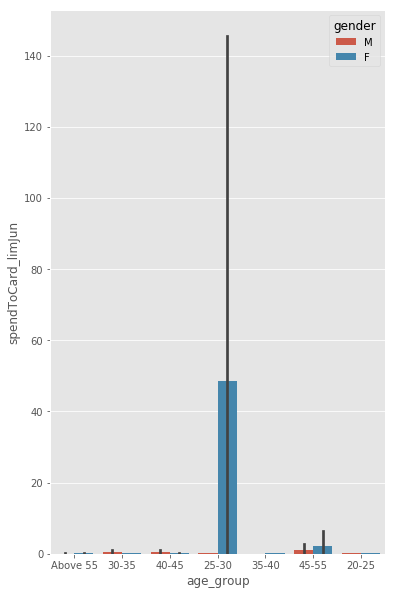

In [418]:
a4_dims = (6, 10)
fig, ax = plt.subplots(figsize=a4_dims)
sns.barplot(new_data1["age_group"], new_data1["spendToCard_limJun"], hue=new_data1["gender"], ax=ax)

Females tend to use credit card more compared to males , age  group 25-30 consistently increasing the spend. 
however, 45-55 age group is consistent across alll moths in spending

In [419]:
new_data1.drop(['spendToCard_limApr', 'spendToCard_limMay',
       'spendToCard_limJun'], axis=1, inplace=True)

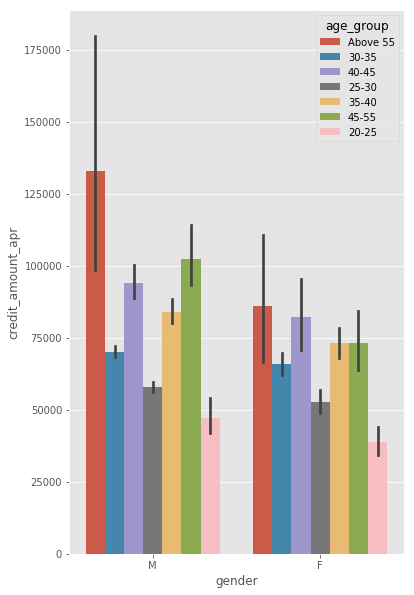

In [408]:
a4_dims = (6, 10)
fig, ax = plt.subplots(figsize=a4_dims)
sns.barplot(new_data1["gender"],new_data1.credit_amount_apr, hue=new_data1["age_group"], ax=ax)

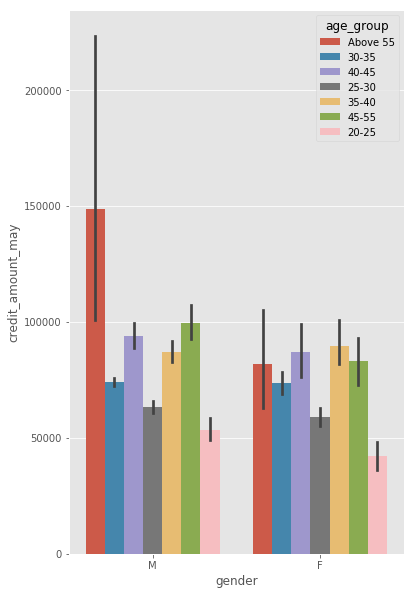

In [410]:
a4_dims = (6, 10)
fig, ax = plt.subplots(figsize=a4_dims)
sns.barplot(new_data1["gender"],new_data1.credit_amount_may, hue=new_data1["age_group"], ax=ax)

above 55 , males skewing credit data

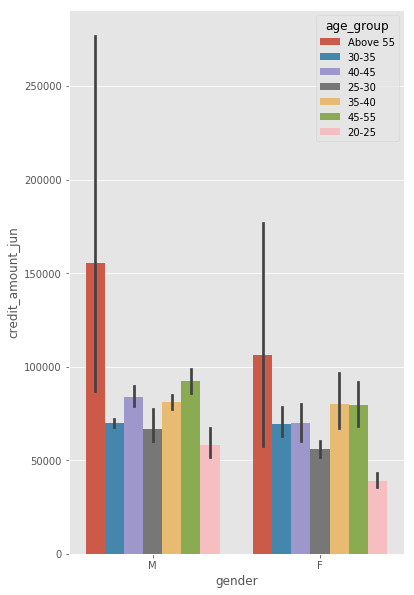

In [412]:
a4_dims = (6, 10)
fig, ax = plt.subplots(figsize=a4_dims)
sns.barplot(new_data1["gender"],new_data1.credit_amount_jun, hue=new_data1["age_group"], ax=ax)

In [ ]:
Females credit amount less than that of males in age agroup of 40 and above, else same

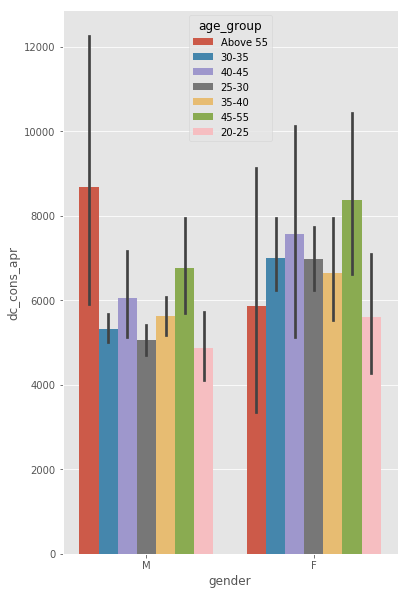

In [413]:
a4_dims = (6, 10)
fig, ax = plt.subplots(figsize=a4_dims)
sns.barplot(data["gender"],data.dc_cons_apr, hue=new_data1["age_group"], ax=ax)

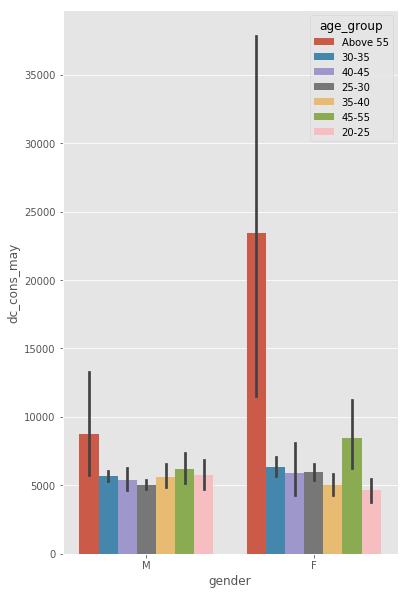

In [414]:
a4_dims = (6, 10)
fig, ax = plt.subplots(figsize=a4_dims)
sns.barplot(data["gender"],data.dc_cons_may,hue=new_data1["age_group"], ax=ax)

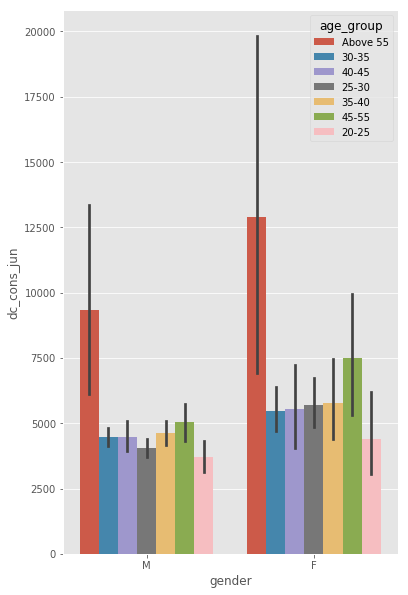

In [415]:
a4_dims = (6, 10)
fig, ax = plt.subplots(figsize=a4_dims)
sns.barplot(data["gender"],data.dc_cons_jun, hue=new_data1["age_group"], ax=ax)

Debit card spend is more or less uniform across all three months both in males and females, except age group of 55 and above

In [318]:
new_data1["age_group"]=new_data1["age_group"].astype("object")

In [323]:
len(new_data1.region_code.unique())

413

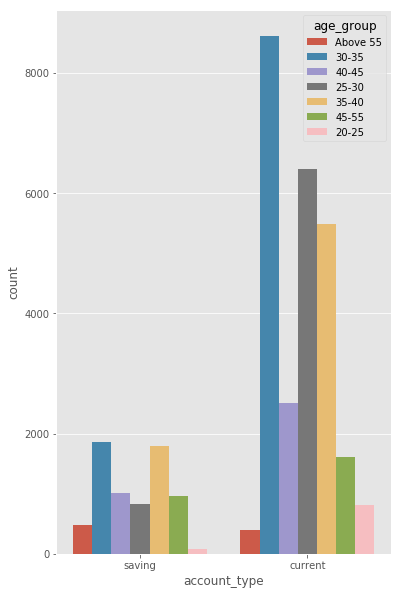

In [433]:
a4_dims = (6, 10)
fig, ax = plt.subplots(figsize=a4_dims)
sns.countplot(new_data1["account_type"], hue=new_data1["age_group"], ax=ax)

#### Valueable Regions

In [440]:
new_data1.region_code.value_counts().head(9)

683    4011
723    2706
233    2666
623    2575
523    2562
534    1559
245    1060
324    1043
823     692
Name: region_code, dtype: int64

In [444]:
new_data1.drop("id", axis=1, inplace=True)

In [445]:
new_data1.describe()

,region_code,emi_active,cc_cons_apr,cc_count_apr,debit_amount_apr,credit_amount_apr,credit_count_apr,debit_count_apr,max_credit_amount_apr,cc_cons_may,...,credit_count_may,debit_count_may,max_credit_amount_may,cc_cons_jun,cc_count_jun,debit_amount_jun,credit_amount_jun,credit_count_jun,debit_count_jun,max_credit_amount_jun
count,32820.000000,3.282000e+04,32820.000000,32820.000000,3.282000e+04,3.282000e+04,32820.000000,32820.000000,3.282000e+04,3.282000e+04,...,32820.000000,32820.000000,3.282000e+04,32820.000000,32820.000000,3.282000e+04,3.282000e+04,32820.000000,32820.000000,3.282000e+04
mean,554.854327,9.567620e+03,16661.907189,9.162191,7.002974e+04,7.541190e+04,14.887290,3.791771,4.647113e+04,1.441190e+04,...,4.087352,13.934795,4.969688e+04,9031.179889,12.298687,7.759673e+04,7.583531e+04,5.767736,16.001438,4.474355e+04
std,188.220317,2.616736e+05,25138.435416,10.388841,1.593964e+05,1.685425e+05,11.274971,3.387716,1.120405e+05,2.363688e+04,...,3.724383,11.087856,1.218650e+05,15720.847307,11.426967,3.033277e+05,2.989925e+05,4.593888,13.055237,1.186464e+05
min,123.000000,0.000000e+00,233.970000,1.000000,4.010000e+00,3.432000e+01,0.000000,0.000000,1.800000e-01,1.030000e+02,...,0.000000,0.000000,1.500000e-01,51.000000,1.000000,5.230000e+00,1.188000e+01,0.000000,0.000000,6.000000e-02
25%,425.000000,0.000000e+00,3712.000000,3.000000,2.334516e+04,2.728763e+04,7.000000,2.000000,1.920000e+04,2.983298e+03,...,2.000000,6.000000,1.989472e+04,1637.875000,5.000000,2.635132e+04,2.405212e+04,3.000000,7.000000,1.668150e+04
50%,575.000000,1.510650e+02,8912.790000,7.000000,4.394296e+04,4.945519e+04,13.000000,3.000000,3.060350e+04,7.332298e+03,...,3.000000,12.000000,3.388250e+04,4147.487500,10.000000,4.965915e+04,4.545429e+04,5.000000,14.000000,2.837750e+04
75%,683.000000,4.176868e+03,19932.060000,12.000000,7.207154e+04,7.541190e+04,20.000000,5.000000,4.647113e+04,1.684785e+04,...,5.000000,18.000000,4.969688e+04,10126.250000,16.000000,7.978210e+04,7.769936e+04,7.000000,21.000000,4.506050e+04
max,977.000000,4.468722e+07,804712.580000,1012.000000,1.353571e+07,1.310058e+07,147.000000,78.000000,1.202915e+07,1.117246e+06,...,71.000000,171.000000,1.285103e+07,382914.100000,653.000000,3.986881e+07,3.933931e+07,117.000000,164.000000,1.293238e+07


In [446]:
new_data1.columns

Index(['account_type', 'gender', 'region_code', 'loan_enq', 'emi_active',
       'age_group', 'cc_cons_apr', 'cc_count_apr', 'debit_amount_apr',
       'credit_amount_apr', 'credit_count_apr', 'debit_count_apr',
       'max_credit_amount_apr', 'cc_cons_may', 'cc_count_may',
       'debit_amount_may', 'credit_amount_may', 'credit_count_may',
       'debit_count_may', 'max_credit_amount_may', 'cc_cons_jun',
       'cc_count_jun', 'debit_amount_jun', 'credit_amount_jun',
       'credit_count_jun', 'debit_count_jun', 'max_credit_amount_jun'],
      dtype='object')

In [449]:
new_data1["region_code"]=new_data1["region_code"].astype("object")

Scaling the data since counts are in hundreds only as compared to amount

In [450]:
from sklearn.preprocessing import MinMaxScaler,StandardScaler, LabelEncoder
new_data1_copy=new_data1.copy()
std_scaler=StandardScaler()

In [455]:
new_data1_copy_OData=new_data1_copy[["account_type","gender",'region_code', 'loan_enq']]
new_data1_copy_OData["age_group"]=new_data1_copy["age_group"]

In [456]:
new_data1_copy.drop(["account_type","gender",'region_code', 'loan_enq'], axis=1, inplace=True)
new_data1_copy.drop("age_group", axis=1, inplace=True)

In [460]:
new_data1_copy.columns

Index(['emi_active', 'cc_cons_apr', 'cc_count_apr', 'debit_amount_apr',
       'credit_amount_apr', 'credit_count_apr', 'debit_count_apr',
       'max_credit_amount_apr', 'cc_cons_may', 'cc_count_may',
       'debit_amount_may', 'credit_amount_may', 'credit_count_may',
       'debit_count_may', 'max_credit_amount_may', 'cc_cons_jun',
       'cc_count_jun', 'debit_amount_jun', 'credit_amount_jun',
       'credit_count_jun', 'debit_count_jun', 'max_credit_amount_jun'],
      dtype='object')

In [457]:
std_scale_newDataCopy=std_scaler.fit_transform(new_data1_copy)

In [461]:
std_scale_newDataCopy=pd.DataFrame(std_scale_newDataCopy, columns=['emi_active', 'cc_cons_apr', 'cc_count_apr', 'debit_amount_apr',
       'credit_amount_apr', 'credit_count_apr', 'debit_count_apr',
       'max_credit_amount_apr', 'cc_cons_may', 'cc_count_may',
       'debit_amount_may', 'credit_amount_may', 'credit_count_may',
       'debit_count_may', 'max_credit_amount_may', 'cc_cons_jun',
       'cc_count_jun', 'debit_amount_jun', 'credit_amount_jun',
       'credit_count_jun', 'debit_count_jun', 'max_credit_amount_jun'])

In [462]:
std_scale_newDataCopy.head(2)

,emi_active,cc_cons_apr,cc_count_apr,debit_amount_apr,credit_amount_apr,credit_count_apr,debit_count_apr,max_credit_amount_apr,cc_cons_may,cc_count_may,...,credit_count_may,debit_count_may,max_credit_amount_may,cc_cons_jun,cc_count_jun,debit_amount_jun,credit_amount_jun,credit_count_jun,debit_count_jun,max_credit_amount_jun
0,-0.036564,-0.356707,-0.689422,-0.118099,-0.149240,-1.054324,-0.824099,0.031497,-0.589465,-0.901125,...,-0.291959,-1.076401,-0.038542,-0.534914,-0.813762,-0.189174,-0.249361,0.268244,-0.995894,-0.373161
1,-0.017596,1.433687,0.176905,0.558497,0.560105,0.453464,1.537410,0.210006,0.654119,0.470582,...,0.513555,-0.354880,0.823080,-0.505335,-0.113653,0.146514,-0.068382,0.485928,0.229686,-0.149552


## Feature Engineering

In [463]:
std_scale_newDataCopy.columns

Index(['emi_active', 'cc_cons_apr', 'cc_count_apr', 'debit_amount_apr',
       'credit_amount_apr', 'credit_count_apr', 'debit_count_apr',
       'max_credit_amount_apr', 'cc_cons_may', 'cc_count_may',
       'debit_amount_may', 'credit_amount_may', 'credit_count_may',
       'debit_count_may', 'max_credit_amount_may', 'cc_cons_jun',
       'cc_count_jun', 'debit_amount_jun', 'credit_amount_jun',
       'credit_count_jun', 'debit_count_jun', 'max_credit_amount_jun'],
      dtype='object')

In [464]:
std_scale_copy=std_scale_newDataCopy.copy()

In [466]:
std_scale_copy["DebitAmount(3mon)"]=std_scale_copy[['debit_amount_apr',
                                                                'debit_amount_may','debit_amount_jun' ]].apply(lambda x:
                                                                                                               ((x[0]+x[1]+x[2])/3), axis=1)

In [468]:
std_scale_copy.drop(['debit_amount_apr','debit_amount_may','debit_amount_jun' ], axis=1, inplace=True)

In [469]:
std_scale_copy.columns

Index(['emi_active', 'cc_cons_apr', 'cc_count_apr', 'credit_amount_apr',
       'credit_count_apr', 'debit_count_apr', 'max_credit_amount_apr',
       'cc_cons_may', 'cc_count_may', 'credit_amount_may', 'credit_count_may',
       'debit_count_may', 'max_credit_amount_may', 'cc_cons_jun',
       'cc_count_jun', 'credit_amount_jun', 'credit_count_jun',
       'debit_count_jun', 'max_credit_amount_jun', 'DebitAmount(3mon)'],
      dtype='object')

In [470]:
std_scale_copy["MaxCreditAmt(3mon)"]=std_scale_copy[['max_credit_amount_apr','max_credit_amount_may', 'max_credit_amount_jun']].apply(lambda x:
                                                                                                               ((x[0]+x[1]+x[2])/3), axis=1)

In [471]:
std_scale_copy.drop(['max_credit_amount_apr','max_credit_amount_may', 'max_credit_amount_jun'], axis=1, inplace=True)

In [472]:
std_scale_copy.columns

Index(['emi_active', 'cc_cons_apr', 'cc_count_apr', 'credit_amount_apr',
       'credit_count_apr', 'debit_count_apr', 'cc_cons_may', 'cc_count_may',
       'credit_amount_may', 'credit_count_may', 'debit_count_may',
       'cc_cons_jun', 'cc_count_jun', 'credit_amount_jun', 'credit_count_jun',
       'debit_count_jun', 'DebitAmount(3mon)', 'MaxCreditAmt(3mon)'],
      dtype='object')

In [473]:
std_scale_copy["DebitCount(3mon)"]=std_scale_copy[['debit_count_apr',
                                                                'debit_count_may','debit_count_jun' ]].apply(lambda x:
                                                                                                               ((x[0]+x[1]+x[2])/3), axis=1)

In [474]:
std_scale_copy.drop(['debit_count_apr','debit_count_may','debit_count_jun' ], axis=1, inplace=True)

In [477]:
std_scale_copy.shape, std_scale_copy.columns

((32820, 16),
 Index(['emi_active', 'cc_cons_apr', 'cc_count_apr', 'credit_amount_apr',
        'credit_count_apr', 'cc_cons_may', 'cc_count_may', 'credit_amount_may',
        'credit_count_may', 'cc_cons_jun', 'cc_count_jun', 'credit_amount_jun',
        'credit_count_jun', 'DebitAmount(3mon)', 'MaxCreditAmt(3mon)',
        'DebitCount(3mon)'],
       dtype='object'))

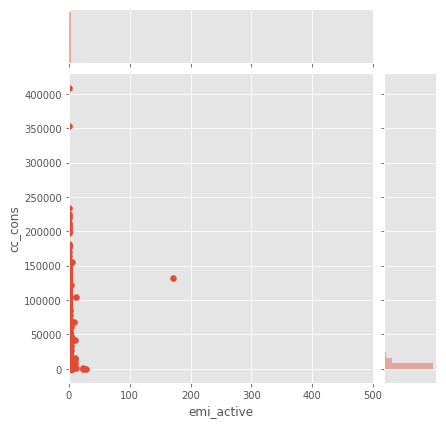

In [479]:
sns.jointplot(std_scale_copy["emi_active"], data["cc_cons"],xlim=(0,500))

## Label Encoding

In [481]:
le=LabelEncoder()

In [482]:
new_data1_copy_OData.columns

Index(['account_type', 'gender', 'region_code', 'loan_enq', 'age_group'], dtype='object')

In [484]:
std_scale_copy["account_type"]=le.fit_transform(new_data1_copy_OData["account_type"])
std_scale_copy["gender"]=le.fit_transform(new_data1_copy_OData["gender"])
std_scale_copy["loan_enq"]=le.fit_transform(new_data1_copy_OData["loan_enq"])
std_scale_copy["age_group"]=le.fit_transform(new_data1_copy_OData["age_group"])

In [485]:
std_scale_copy.columns

Index(['emi_active', 'cc_cons_apr', 'cc_count_apr', 'credit_amount_apr',
       'credit_count_apr', 'cc_cons_may', 'cc_count_may', 'credit_amount_may',
       'credit_count_may', 'cc_cons_jun', 'cc_count_jun', 'credit_amount_jun',
       'credit_count_jun', 'DebitAmount(3mon)', 'MaxCreditAmt(3mon)',
       'DebitCount(3mon)', 'account_type', 'gender', 'loan_enq', 'age_group'],
      dtype='object')

In [619]:
from sklearn.model_selection import train_test_split, GridSearchCV, KFold, cross_val_score, cross_validate
from sklearn.feature_selection import RFECV 
# Feature ranking with recursive feature elimination and cross-validated selection of the best number of features.
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import AdaBoostRegressor, BaggingRegressor,GradientBoostingRegressor,RandomForestRegressor
from  sklearn.linear_model import Lasso, LinearRegression,ridge_regression,SGDRegressor, Ridge
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error,r2_score, mean_squared_log_error

In [504]:
loan_data=loan_data.fillna(0.0)
std_scale_copy[['personal_loan_active', 'vehicle_loan_active', 'personal_loan_closed',
        'vehicle_loan_closed']]=loan_data[['personal_loan_active', 'vehicle_loan_active', 'personal_loan_closed',
        'vehicle_loan_closed']]

In [505]:
std_scale_copy.shape, y.shape

((32820, 24), (32820,))

## Preparing test Data

In [677]:
test_data=pd.read_csv(r'C:\Users\payal2.bhatia\Downloads\test_9K3DBWQ.csv')

In [679]:
test_data.shape, test_data.columns

((14067, 43),
 Index(['id', 'account_type', 'gender', 'age', 'region_code', 'cc_cons_apr',
        'dc_cons_apr', 'cc_cons_may', 'dc_cons_may', 'cc_cons_jun',
        'dc_cons_jun', 'cc_count_apr', 'cc_count_may', 'cc_count_jun',
        'dc_count_apr', 'dc_count_may', 'dc_count_jun', 'card_lim',
        'personal_loan_active', 'vehicle_loan_active', 'personal_loan_closed',
        'vehicle_loan_closed', 'investment_1', 'investment_2', 'investment_3',
        'investment_4', 'debit_amount_apr', 'credit_amount_apr',
        'debit_count_apr', 'credit_count_apr', 'max_credit_amount_apr',
        'debit_amount_may', 'credit_amount_may', 'credit_count_may',
        'debit_count_may', 'max_credit_amount_may', 'debit_amount_jun',
        'credit_amount_jun', 'credit_count_jun', 'debit_count_jun',
        'max_credit_amount_jun', 'loan_enq', 'emi_active'],
       dtype='object'))

In [680]:
test_data.isna().sum().sort_values(ascending=False)

investment_4             13894
loan_enq                 13821
vehicle_loan_active      13712
investment_3             13453
investment_1             13417
vehicle_loan_closed      13386
investment_2             13040
personal_loan_active     12933
personal_loan_closed     12808
dc_cons_jun               9064
dc_cons_apr               8230
dc_count_apr              8230
dc_cons_may               7375
dc_count_may              7375
dc_count_jun              6552
max_credit_amount_may     1495
credit_amount_may         1495
max_credit_amount_apr     1465
credit_amount_apr         1465
cc_count_apr              1038
debit_amount_may          1001
debit_amount_jun           945
credit_count_may           897
debit_count_may            897
debit_amount_apr           847
debit_count_apr            788
credit_count_apr           788
max_credit_amount_jun      663
credit_amount_jun          663
debit_count_jun            655
credit_count_jun           655
cc_count_jun               634
cc_count

In [681]:
test_data["loan_enq"]=test_data["loan_enq"].fillna("N")
test_data["loan_enq"].value_counts()


N    13821
Y      246
Name: loan_enq, dtype: int64

In [682]:
test_data.drop(["investment_1", "investment_2","investment_3","investment_4"], axis=1, inplace=True)

In [683]:
test_data[['personal_loan_active', 'vehicle_loan_active', 'personal_loan_closed',
        'vehicle_loan_closed']]=test_data[['personal_loan_active', 'vehicle_loan_active', 'personal_loan_closed',
        'vehicle_loan_closed']].fillna(0.0)

#### Imputing missing values 

In [684]:
test_data2=test_data[['cc_cons_apr',
         'cc_cons_may', 'cc_cons_jun',
        'cc_count_apr', 'cc_count_may', 'cc_count_jun',
         'debit_amount_apr', 'credit_amount_apr',
        'debit_count_apr', 'credit_count_apr', 'max_credit_amount_apr',
        'debit_amount_may', 'credit_amount_may', 'credit_count_may',
        'debit_count_may', 'max_credit_amount_may', 'debit_amount_jun',
        'credit_amount_jun', 'credit_count_jun', 'debit_count_jun',
        'max_credit_amount_jun']]

In [506]:
new_data1.columns

Index(['account_type', 'gender', 'region_code', 'loan_enq', 'emi_active',
       'age_group', 'cc_cons_apr', 'cc_count_apr', 'debit_amount_apr',
       'credit_amount_apr', 'credit_count_apr', 'debit_count_apr',
       'max_credit_amount_apr', 'cc_cons_may', 'cc_count_may',
       'debit_amount_may', 'credit_amount_may', 'credit_count_may',
       'debit_count_may', 'max_credit_amount_may', 'cc_cons_jun',
       'cc_count_jun', 'debit_amount_jun', 'credit_amount_jun',
       'credit_count_jun', 'debit_count_jun', 'max_credit_amount_jun'],
      dtype='object')

In [685]:
test_data2.fillna(test_data2.mean(), inplace=True)

In [686]:
test_data["card_lim"].fillna(test_data["card_lim"].mean(), inplace=True)

In [709]:
test_data2["card_lim"]=test_data["card_lim"]

In [687]:
test_data2.isna().sum()

cc_cons_apr              0
cc_cons_may              0
cc_cons_jun              0
cc_count_apr             0
cc_count_may             0
cc_count_jun             0
debit_amount_apr         0
credit_amount_apr        0
debit_count_apr          0
credit_count_apr         0
max_credit_amount_apr    0
debit_amount_may         0
credit_amount_may        0
credit_count_may         0
debit_count_may          0
max_credit_amount_may    0
debit_amount_jun         0
credit_amount_jun        0
credit_count_jun         0
debit_count_jun          0
max_credit_amount_jun    0
dtype: int64

In [699]:
test_data2["DebitAmount(3mon)"]=test_data2[['debit_amount_apr',
                                                                'debit_amount_may','debit_amount_jun' ]].apply(lambda x:
                                                                                                               ((x[0]+x[1]+x[2])/3), axis=1)

In [700]:
test_data2["MaxCreditAmt(3mon)"]=test_data2[['max_credit_amount_apr','max_credit_amount_may', 'max_credit_amount_jun']].apply(lambda x:
                                                                                                               ((x[0]+x[1]+x[2])/3), axis=1)

In [701]:
test_data2["DebitCount(3mon)"]=test_data2[['debit_count_apr',
                                                                'debit_count_may','debit_count_jun' ]].apply(lambda x:
                                                                                                               ((x[0]+x[1]+x[2])/3), axis=1)

In [519]:
new_data1.age_group.value_counts()

30-35       10465
35-40        7276
25-30        7221
40-45        3522
45-55        2572
Above 55      883
20-25         881
Name: age_group, dtype: int64

In [691]:
bins=[20,25, 30,35, 40,45, 55, 225]
labels=["20-25","25-30","30-35","35-40","40-45","45-55", "Above 55"]
test_data["age_group"]=pd.cut(test_data["age"], bins=bins,right=True, include_lowest=True, labels=labels)

In [692]:
test_data["account_type"]=le.fit_transform(test_data["account_type"])
test_data["gender"]=le.fit_transform(test_data["gender"])
test_data["loan_enq"]=le.fit_transform(test_data["loan_enq"])
test_data["age_group"]=le.fit_transform(test_data["age_group"])

In [693]:
test_data.drop(["age", 'debit_amount_apr','debit_amount_may','debit_amount_jun','max_credit_amount_apr',
                'max_credit_amount_may', 'max_credit_amount_jun',
               'debit_count_apr','debit_count_may','debit_count_jun',
                'dc_cons_apr', 'dc_cons_may','dc_count_apr','dc_cons_jun', 'dc_count_jun', 'dc_count_may',], axis=1, inplace=True)

In [727]:
 x=[]
for i in std_scale_copy.columns:
    if i not in std_scale_test_data.columns:
       
        x.append(i)
    

In [728]:
x

['emi_active']

In [694]:
test_dataO=test_data[["account_type","gender",'region_code', 'loan_enq', "age_group",'personal_loan_active', 'vehicle_loan_active', 'personal_loan_closed',
       'vehicle_loan_closed','id', 'region_code' ]]

In [706]:
test_data2.drop(['debit_amount_apr','debit_amount_may','debit_count_apr','debit_count_may','max_credit_amount_apr','max_credit_amount_may', 'debit_amount_jun','debit_count_jun',
       'max_credit_amount_jun'], axis=1, inplace=True)

In [710]:
test_data2.columns

Index(['cc_cons_apr', 'cc_cons_may', 'cc_cons_jun', 'cc_count_apr',
       'cc_count_may', 'cc_count_jun', 'credit_amount_apr', 'credit_count_apr',
       'credit_amount_may', 'credit_count_may', 'credit_amount_jun',
       'credit_count_jun', 'DebitAmount(3mon)', 'MaxCreditAmt(3mon)',
       'DebitCount(3mon)', 'card_lim'],
      dtype='object')

In [711]:
std_scale_test_data=std_scaler.fit_transform(test_data2)

In [ ]:
data["card_lim"].fillna(data["card_lim"].mean(), inplace=True)

In [601]:
std_scale_card_lim=std_scaler.fit_transform(data.loc[:,["card_lim"]])

In [602]:
std_scale_copy["card_lim"]=pd.DataFrame(std_scale_card_lim)

In [712]:
std_scale_test_data=pd.DataFrame(std_scale_test_data,columns=['cc_cons_apr', 'cc_cons_may', 'cc_cons_jun', 'cc_count_apr',
       'cc_count_may', 'cc_count_jun', 'credit_amount_apr', 'credit_count_apr',
       'credit_amount_may', 'credit_count_may', 'credit_amount_jun',
       'credit_count_jun', 'DebitAmount(3mon)', 'MaxCreditAmt(3mon)',
       'DebitCount(3mon)', 'card_lim'])

In [713]:
std_scale_test_data['account_type']=test_dataO["account_type"]

In [714]:
std_scale_test_data['gender']=test_dataO["gender"]

In [564]:
# test_dataO.drop_duplicates(["region_code"],inplace=True)

In [566]:
# std_scale_test_data['region_code']=test_dataO["region_code"]

In [715]:
std_scale_test_data['loan_enq']=test_dataO["loan_enq"]

In [716]:
std_scale_test_data['age_group']=test_dataO["age_group"]

In [717]:
std_scale_test_data['personal_loan_active']=test_dataO["personal_loan_active"]

In [718]:
std_scale_test_data['vehicle_loan_active']=test_dataO["vehicle_loan_active"]

In [719]:
std_scale_test_data['personal_loan_closed']=test_dataO["personal_loan_closed"]

In [720]:
std_scale_test_data['vehicle_loan_closed']=test_dataO["vehicle_loan_closed"]

In [721]:
std_scale_test_data['id']=test_dataO["id"]

In [723]:
test_dataO = test_dataO.loc[:,~test_dataO.columns.duplicated()]

In [724]:
std_scale_test_data["region_code"]=test_dataO['region_code']

In [732]:
std_scale_test_data["emi_active"]=pd.DataFrame(std_scaler.fit_transform(test_data.loc[:,["emi_active"]]))

In [725]:
std_scale_copy.columns

Index(['emi_active', 'cc_cons_apr', 'cc_count_apr', 'credit_amount_apr',
       'credit_count_apr', 'cc_cons_may', 'cc_count_may', 'credit_amount_may',
       'credit_count_may', 'cc_cons_jun', 'cc_count_jun', 'credit_amount_jun',
       'credit_count_jun', 'DebitAmount(3mon)', 'MaxCreditAmt(3mon)',
       'DebitCount(3mon)', 'account_type', 'gender', 'loan_enq', 'age_group',
       'personal_loan_active', 'vehicle_loan_active', 'personal_loan_closed',
       'vehicle_loan_closed', 'card_lim', 'id', 'region_code'],
      dtype='object')

In [581]:
std_scale_copy["id"]=data["id"]
std_scale_copy["region_code"]=data["region_code"]

In [733]:
std_scale_copy.shape

(32820, 27)

In [734]:
std_scale_test_data.shape

(14067, 27)

In [585]:
std_scale_copy.columns

Index(['emi_active', 'cc_cons_apr', 'cc_count_apr', 'credit_amount_apr',
       'credit_count_apr', 'cc_cons_may', 'cc_count_may', 'credit_amount_may',
       'credit_count_may', 'cc_cons_jun', 'cc_count_jun', 'credit_amount_jun',
       'credit_count_jun', 'DebitAmount(3mon)', 'MaxCreditAmt(3mon)',
       'DebitCount(3mon)', 'account_type', 'gender', 'loan_enq', 'age_group',
       'personal_loan_active', 'vehicle_loan_active', 'personal_loan_closed',
       'vehicle_loan_closed', 'card_lim', 'id', 'region_code'],
      dtype='object')

##### Re-ordering as training set 

In [735]:
std_scale_test_data=std_scale_test_data[['emi_active', 'cc_cons_apr', 'cc_count_apr', 'credit_amount_apr',
       'credit_count_apr', 'cc_cons_may', 'cc_count_may', 'credit_amount_may',
       'credit_count_may', 'cc_cons_jun', 'cc_count_jun', 'credit_amount_jun',
       'credit_count_jun', 'DebitAmount(3mon)', 'MaxCreditAmt(3mon)',
       'DebitCount(3mon)', 'account_type', 'gender', 'loan_enq', 'age_group',
       'personal_loan_active', 'vehicle_loan_active', 'personal_loan_closed',
       'vehicle_loan_closed', 'card_lim', 'id', 'region_code']]

In [736]:
std_scale_test_data.columns

Index(['emi_active', 'cc_cons_apr', 'cc_count_apr', 'credit_amount_apr',
       'credit_count_apr', 'cc_cons_may', 'cc_count_may', 'credit_amount_may',
       'credit_count_may', 'cc_cons_jun', 'cc_count_jun', 'credit_amount_jun',
       'credit_count_jun', 'DebitAmount(3mon)', 'MaxCreditAmt(3mon)',
       'DebitCount(3mon)', 'account_type', 'gender', 'loan_enq', 'age_group',
       'personal_loan_active', 'vehicle_loan_active', 'personal_loan_closed',
       'vehicle_loan_closed', 'card_lim', 'id', 'region_code'],
      dtype='object')

# Modelling 

In [604]:
X_train, X_test, y_train, y_test=train_test_split(std_scale_copy, y)

In [590]:
X_train.shape, X_test.shape, y_test.shape, y_train.shape

((24615, 27), (8205, 27), (8205,), (24615,))

In [608]:
models=['Linear Regression' , 'Lasso Regression' , 'AdaBoost Regression' , "Ridge Regression",  'GradientBoosting Regression',
          'RandomForest Regression' ,
         'KNeighbours Regression']
r2_scores=[]

In [610]:
LR=LinearRegression()
LassR=Lasso()
AdaR=AdaBoostRegressor()
ridge_R=Ridge()
GBR=GradientBoostingRegressor()
RfR=RandomForestRegressor()
KNNR=KNeighborsRegressor()

In [638]:
model=[LR, LassR, AdaR,ridge_R,GBR,RfR, KNNR]
rmse=[]
rmsLe=[]

In [621]:
rmsle_training=[]
r2_scores_training=[]


In [637]:
# def rmsle(real, predicted):
# #     sum=0.0
#     for x in range(len(predicted)):
#         if predicted[x]<0 or real[x]<0: #check for negative values
#             continue
#         p = np.log(predicted[x]+1.1)
#         r = np.log(real[x]+1.1)
# #         sum = sum + (p - r)**2
#     return ((p-r)**0.5)

In [664]:
def rmsle(y, y0):
    return np.sqrt(np.mean(np.square(np.log1p(y) - np.log1p(y0))))

In [656]:
LR.fit(X_train, y_train)
y_pred=LR.predict(X_test)

In [657]:
rmsle(y_test, y_pred)

1.3552986135234883

In [659]:
for i in model:
    clf=i
    clf.fit(X_train, y_train)
    y_pred=clf.predict(X_test)
    score=r2_score(y_test, y_pred)
    r2_scores.append(score)
    mse=mean_squared_error(y_test, y_pred)
#     rmsle=rmsle(y_test, y_pred)
#     rmsLe.append(rmsle)
    rmse.append(mse)

In [660]:
d={"Model":models, "R2":r2_scores, "MSE": rmse }
len(models),len(rmse), len(r2_scores)

(7, 9, 33)

In [617]:
model_result=pd.DataFrame(d)

In [618]:
model_result

,Model,R2,MSE
0,Linear Regression,0.252382,1.269139e+08
1,Lasso Regression,0.252545,1.268861e+08
2,AdaBoost Regression,-1.365154,4.015031e+08
3,Ridge Regression,0.252391,1.269123e+08
4,GradientBoosting Regression,0.225994,1.313934e+08
5,RandomForest Regression,0.149282,1.444159e+08
6,KNeighbours Regression,-0.172682,1.990718e+08


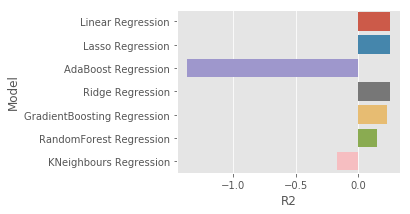

In [661]:
sns.barplot( "R2","Model", data=model_result)

In [ ]:
Ridge performing better than all

In [662]:
ridge_R.fit(X_train, y_train)
y_pred=ridge_R.predict(X_test)


In [665]:
rmsle(y_test, y_pred)

1.3552972628965236

In [738]:
predicted=ridge_R.predict(std_scale_test_data)

In [740]:
cc_cons=pd.DataFrame(predicted)

In [744]:
submission = pd.DataFrame([std_scale_test_data["id"],predicted], columns=['id','cc_cons']).to_csv("sample_submission.csv")

## 2nd Approach 

In [745]:
std_scale_newDataCopy.columns

Index(['emi_active', 'cc_cons_apr', 'cc_count_apr', 'debit_amount_apr',
       'credit_amount_apr', 'credit_count_apr', 'debit_count_apr',
       'max_credit_amount_apr', 'cc_cons_may', 'cc_count_may',
       'debit_amount_may', 'credit_amount_may', 'credit_count_may',
       'debit_count_may', 'max_credit_amount_may', 'cc_cons_jun',
       'cc_count_jun', 'debit_amount_jun', 'credit_amount_jun',
       'credit_count_jun', 'debit_count_jun', 'max_credit_amount_jun'],
      dtype='object')

In [746]:
import statsmodels.api as sm 

In [747]:
X_train.columns

Index(['emi_active', 'cc_cons_apr', 'cc_count_apr', 'credit_amount_apr',
       'credit_count_apr', 'cc_cons_may', 'cc_count_may', 'credit_amount_may',
       'credit_count_may', 'cc_cons_jun', 'cc_count_jun', 'credit_amount_jun',
       'credit_count_jun', 'DebitAmount(3mon)', 'MaxCreditAmt(3mon)',
       'DebitCount(3mon)', 'account_type', 'gender', 'loan_enq', 'age_group',
       'personal_loan_active', 'vehicle_loan_active', 'personal_loan_closed',
       'vehicle_loan_closed', 'card_lim', 'id', 'region_code'],
      dtype='object')

In [748]:
stats_model1=sm.OLS(y_train,X_train, data=std_scale_copy).fit()

In [749]:
stats_model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                cc_cons   R-squared:                       0.387
Model:                            OLS   Adj. R-squared:                  0.386
Method:                 Least Squares   F-statistic:                     574.4
Date:                Mon, 22 Jul 2019   Prob (F-statistic):               0.00
Time:                        11:05:30   Log-Likelihood:            -2.6400e+05
No. Observations:               24615   AIC:                         5.281e+05
Df Residuals:                   24588   BIC:                         5.283e+05
Df Model:                          27                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
emi_active             364.5150    222.531      1.638      0.101     -71.660     800.689
cc_cons_apr           1529.3335     89.760     17.038      0.000    1353.399    1705.268
cc_count_apr          -564.6016    128.051     -4.409      0.000    -815.590    -313.613
credit_amount_apr      764.6557    229.907      3.326      0.001     314.024    1215.287
credit_count_apr      -136.2642    115.147     -1.183      0.237    -361.959      89.431
cc_cons_may           1457.4552     87.232     16.708      0.000    1286.475    1628.435
cc_count_may           116.0910    117.981      0.984      0.325    -115.160     347.342
credit_amount_may      853.1315    237.310      3.595      0.000     387.989    1318.274
credit_count_may       -89.5321    104.084     -0.860      0.390    -293.543     114.479
cc_cons_jun           2651.5026     80.615     32.891      0.000    2493.492    2809.514
cc_count_jun           620.5950    103.986      5.968      0.000     416.777     824.413
credit_amount_jun      916.7094    262.608      3.491      0.000     401.981    1431.438
credit_count_jun      -195.4513     99.774     -1.959      0.050    -391.015       0.112
DebitAmount(3mon)    -1844.7164    517.565     -3.564      0.000   -2859.175    -830.258
MaxCreditAmt(3mon)     325.4143    274.916      1.184      0.237    -213.437     864.266
DebitCount(3mon)       285.9609    174.719      1.637      0.102     -56.498     628.420
account_type           727.7487    177.106      4.109      0.000     380.611    1074.887
gender                 948.6861    176.319      5.380      0.000     603.089    1294.283
loan_enq              -728.6065    526.892     -1.383      0.167   -1761.347     304.134
age_group              297.0678     54.837      5.417      0.000     189.585     404.551
personal_loan_active   -10.8525    264.488     -0.041      0.967    -529.266     507.560
vehicle_loan_active    927.5992    439.090      2.113      0.035      66.956    1788.242
personal_loan_closed   475.5433    261.064      1.822      0.069     -36.159     987.245
vehicle_loan_closed   1747.6820    336.171      5.199      0.000    1088.766    2406.598
card_lim              1346.5422     81.984     16.424      0.000    1185.849    1507.235
id                       0.0454      0.005      9.398      0.000       0.036       0.055
region_code              6.5394      0.292     22.420      0.000       5.968       7.111
==============================================================================
Omnibus:                    28600.975   Durbin-Watson:                   2.007
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          6232736.986
Skew:                           5.865   Prob(JB):                         0.00
Kurtosis:                      80.067   Cond. No.                     2.46e+05
==================

In [750]:
stats_model1.params

emi_active               364.514972
cc_cons_apr             1529.333527
cc_count_apr            -564.601610
credit_amount_apr        764.655657
credit_count_apr        -136.264232
cc_cons_may             1457.455233
cc_count_may             116.091008
credit_amount_may        853.131539
credit_count_may         -89.532065
cc_cons_jun             2651.502589
cc_count_jun             620.594966
credit_amount_jun        916.709446
credit_count_jun        -195.451312
DebitAmount(3mon)      -1844.716371
MaxCreditAmt(3mon)       325.414322
DebitCount(3mon)         285.960856
account_type             727.748672
gender                   948.686135
loan_enq                -728.606550
age_group                297.067833
personal_loan_active     -10.852548
vehicle_loan_active      927.599195
personal_loan_closed     475.543264
vehicle_loan_closed     1747.682021
card_lim                1346.542232
id                         0.045426
region_code                6.539368
dtype: float64

In [758]:
result=stats_model1.predict(std_scale_test_data)

In [760]:
result.shape, std_scale_test_data.shape

((14067,), (14067, 27))

#### Correlation among variables

In [762]:
# sns.pairplot(X_train)

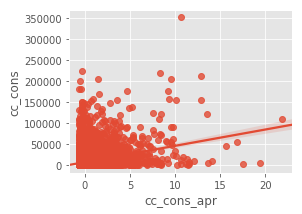

In [763]:
sns.regplot(x=X_train["cc_cons_apr"], y=y_train)

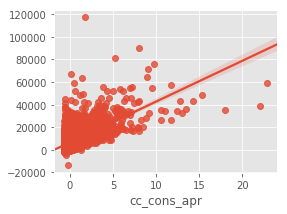

In [764]:
sns.regplot(x=std_scale_test_data["cc_cons_apr"], y=result)

##### Diagonostic plots 

In [765]:
dataframe= pd.concat([X_train, y_train], axis=1)

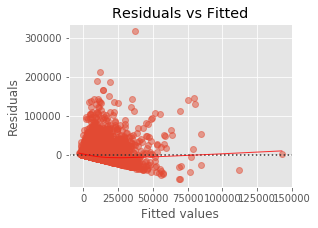

In [766]:
# model values
model_fitted_y = stats_model1.fittedvalues
# model residuals
model_residuals = stats_model1.resid
# normalized residuals
model_norm_residuals = stats_model1.get_influence().resid_studentized_internal
# absolute squared normalized residuals
model_norm_residuals_abs_sqrt = np.sqrt(np.abs(model_norm_residuals))
# absolute residuals
model_abs_resid = np.abs(model_residuals)
# leverage, from statsmodels internals
model_leverage = stats_model1.get_influence().hat_matrix_diag
# cook's distance, from statsmodels internals
model_cooks = stats_model1.get_influence().cooks_distance[0]

plot_lm_1 = plt.figure()
plot_lm_1.axes[0] = sns.residplot(model_fitted_y, dataframe.columns[-1], data=dataframe,
                          lowess=True,
                          scatter_kws={'alpha': 0.5},
                          line_kws={'color': 'red', 'lw': 1, 'alpha': 0.8})

plot_lm_1.axes[0].set_title('Residuals vs Fitted')
plot_lm_1.axes[0].set_xlabel('Fitted values')
plot_lm_1.axes[0].set_ylabel('Residuals');

##### QQ PLots

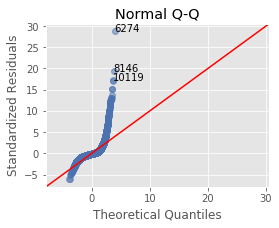

In [768]:
from statsmodels.graphics.gofplots import ProbPlot
QQ = ProbPlot(model_norm_residuals)
plot_lm_2 = QQ.qqplot(line='45', alpha=0.5, color='#4C72B0', lw=1)
plot_lm_2.axes[0].set_title('Normal Q-Q')
plot_lm_2.axes[0].set_xlabel('Theoretical Quantiles')
plot_lm_2.axes[0].set_ylabel('Standardized Residuals');
# annotations
abs_norm_resid = np.flip(np.argsort(np.abs(model_norm_residuals)), 0)
abs_norm_resid_top_3 = abs_norm_resid[:3]
for r, i in enumerate(abs_norm_resid_top_3):
    plot_lm_2.axes[0].annotate(i,
                               xy=(np.flip(QQ.theoretical_quantiles, 0)[r],
                                   model_norm_residuals[i]));

residuals are not normally distributed -- violated assumption

##### Heteroskedasticity  - non-constant variance, aka heteroscedasticity.

KeyError: 8146

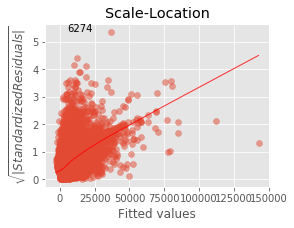

In [770]:
plot_lm_3 = plt.figure()
plt.scatter(model_fitted_y, model_norm_residuals_abs_sqrt, alpha=0.5);
sns.regplot(model_fitted_y, model_norm_residuals_abs_sqrt,
              scatter=False,
              ci=False,
              lowess=True,
          line_kws={'color': 'red', 'lw': 1, 'alpha': 0.8});
plot_lm_3.axes[0].set_title('Scale-Location')
plot_lm_3.axes[0].set_xlabel('Fitted values')
plot_lm_3.axes[0].set_ylabel('$\sqrt{|Standardized Residuals|}$');

# annotations
abs_sq_norm_resid = np.flip(np.argsort(model_norm_residuals_abs_sqrt), 0)
abs_sq_norm_resid_top_3 = abs_sq_norm_resid[:3]
for i in abs_norm_resid_top_3:
  plot_lm_3.axes[0].annotate(i,
                             xy=(model_fitted_y[i],
                                 model_norm_residuals_abs_sqrt[i]));

##### Residuals vs Leverage

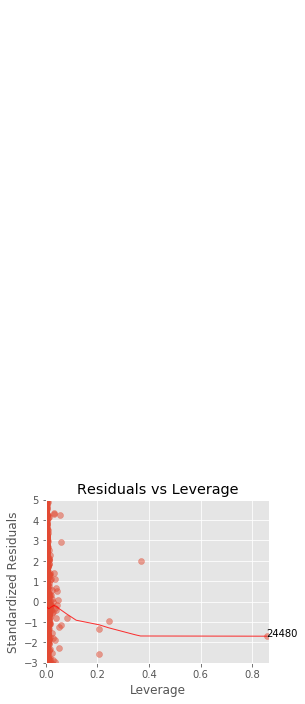

In [771]:
plot_lm_4 = plt.figure();
plt.scatter(model_leverage, model_norm_residuals, alpha=0.5);
sns.regplot(model_leverage, model_norm_residuals,
          scatter=False,
          ci=False,
          lowess=True,
          line_kws={'color': 'red', 'lw': 1, 'alpha': 0.8});
plot_lm_4.axes[0].set_xlim(0, max(model_leverage)+0.01)
plot_lm_4.axes[0].set_ylim(-3, 5)
plot_lm_4.axes[0].set_title('Residuals vs Leverage')
plot_lm_4.axes[0].set_xlabel('Leverage')
plot_lm_4.axes[0].set_ylabel('Standardized Residuals');

# annotations
leverage_top_3 = np.flip(np.argsort(model_cooks), 0)[:3]
for i in leverage_top_3:
  plot_lm_4.axes[0].annotate(i,
                             xy=(model_leverage[i],
                                 model_norm_residuals[i]));

In [776]:
import dill
dill.dump_session("AV AMEX.ipynb")

RecursionError: maximum recursion depth exceeded while calling a Python object

In [778]:
import dill
dill.dump_session('notebook_env.db')

RecursionError: maximum recursion depth exceeded while calling a Python object

In [ ]:
# backup = pd.HDFStore('backup.h5')
# var1 = backup['var1']

In [782]:
%%cache 
%%cache longcalc.pkl var1 var2 var3
var1 = longcalculation()

UsageError: Cell magic `%%cache` not found.
